<a href="https://colab.research.google.com/github/rafidddeshmukh/Regression-Bike_Sharing_Demand_Prediction/blob/main/Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Mohammed Rafid(Individual)


# **Project Summary -**

A Machine Learning regression predictive model for bike sharing demand prediction. A bike-sharing system provides people with a sustainable mode of transportation and has beneficial effects for both the environment and the user. In recent days, Pubic rental bike sharing is becoming popular because of is increased comfortableness and environmental sustainability. Data used include Seoul Bike and Capital Bikeshare program data. Data have weather data associated with it for each hour. For the dataset, we are using linear regression model were train with optimize hyperparameters using a repeated cross validation approach and testing set is used for evaluation. Multiple evaluation indices such as R2 , Root Mean Square error are use to measure the prediction performance of the regression models. The performance of the model is vary with the time interval used in transforming data.

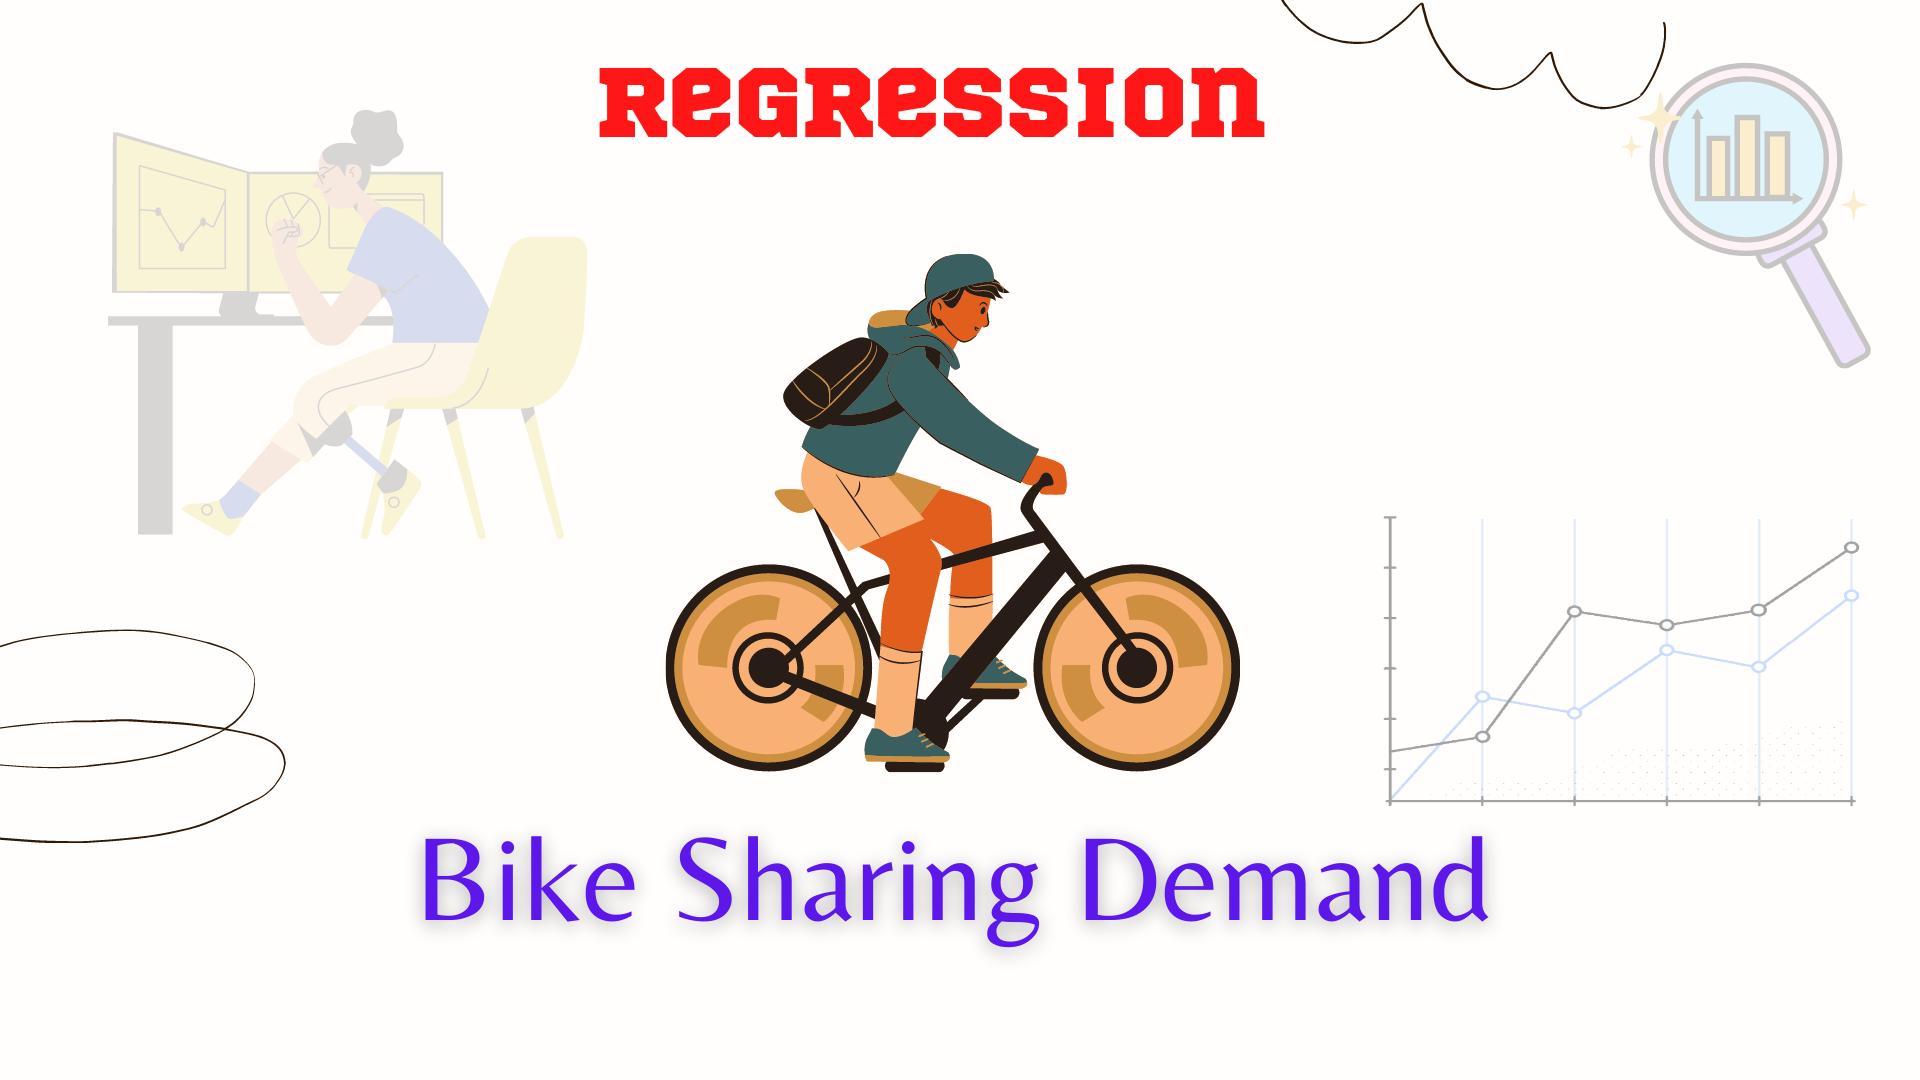

# **GitHub Link -**

https://github.com/rafidddeshmukh/Regression-Bike_Sharing_Demand_Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The main objective is to make predictive model, which could help them in redicting the bike demands proactively. This will help them in stable supply of bike wherever needed.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing necessary libraries for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Importing library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing warnings library
import warnings
warnings.filterwarnings('ignore')

# Importing library for OLS
import statsmodels.api as sm



### Dataset Loading

In [ ]:
#drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset

#dateset file path
path = "/content/drive/MyDrive/Colab Notebooks/Almabeter/ML\
/Linear Regression/project/Regression-Bike_sharing_Demand_prediction/"

#read csv file
bike_df =pd.read_csv(path + "SeoulBikeData.csv", encoding= 'unicode_escape',
                     parse_dates=[0])


### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum().sort_values(ascending=False)[:5]

Date                 0
Rented Bike Count    0
Hour                 0
Temperature(°C)      0
Humidity(%)          0
dtype: int64

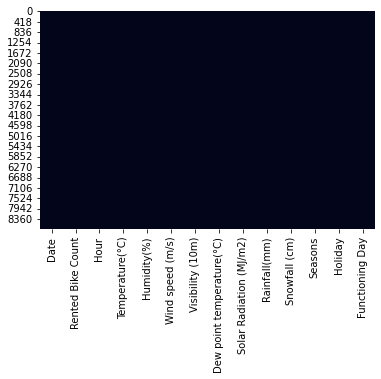

In [ ]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar=False,)

### What did you know about your dataset?


The dataset was retrieved from UCI Machine Repository and contains the number of public bicycles. It is composed of 14 attributes with 8760 instances.

Each 24 instances represent one day in a year. The target is the
number of bicycles rented per hour.

There are no mising values and duplicate values in this dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe(include='all').transpose()

count unique                  top  freq  \
Date                         8760    365  2017-01-12 00:00:00    24   
Rented Bike Count          8760.0    NaN                  NaN   NaN   
Hour                       8760.0    NaN                  NaN   NaN   
Temperature(°C)            8760.0    NaN                  NaN   NaN   
Humidity(%)                8760.0    NaN                  NaN   NaN   
Wind speed (m/s)           8760.0    NaN                  NaN   NaN   
Visibility (10m)           8760.0    NaN                  NaN   NaN   
Dew point temperature(°C)  8760.0    NaN                  NaN   NaN   
Solar Radiation (MJ/m2)    8760.0    NaN                  NaN   NaN   
Rainfall(mm)               8760.0    NaN                  NaN   NaN   
Snowfall (cm)              8760.0    NaN                  NaN   NaN   
Seasons                      8760      4               Spring  2208   
Holiday                      8760      2           No Holiday  8328   
Functioning Day              8760      2                  Yes  8465   

                               first       last         mean         std  \
Date                      2017-01-12 2018-12-11          NaN         NaN   
Rented Bike Count                NaT        NaT   704.602055  644.997468   
Hour                             NaT        NaT         11.5    6.922582   
Temperature(°C)                  NaT        NaT    12.882922   11.944825   
Humidity(%)                      NaT        NaT    58.226256   20.362413   
Wind speed (m/s)                 NaT        NaT     1.724909      1.0363   
Visibility (10m)                 NaT        NaT  1436.825799  608.298712   
Dew point temperature(°C)        NaT        NaT     4.073813   13.060369   
Solar Radiation (MJ/m2)          NaT        NaT     0.569111    0.868746   
Rainfall(mm)                     NaT        NaT     0.148687    1.128193   
Snowfall (cm)                    NaT        NaT     0.075068    0.436746   
Seasons                          NaT        NaT          NaN         NaN   
Holiday                          NaT        NaT          NaN         NaN   
Functioning Day                  NaT        NaT          NaN         NaN   

                            min    25%     50%      75%     max  
Date                        NaN    NaN     NaN      NaN     NaN  
Rented Bike Count           0.0  191.0   504.5  1065.25  3556.0  
Hour                        0.0   5.75    11.5    17.25    23.0  
Temperature(°C)           -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)            0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C) -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)     0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)               0.0    0.0     0.0      0.0     8.8  
Seasons                     NaN    NaN     NaN      NaN     NaN  
Holiday                     NaN    NaN     NaN      NaN     NaN  
Functioning Day             NaN    NaN     NaN      NaN     NaN

### Variables Description 

Rented Bike count - Count of bikes rented at each hour

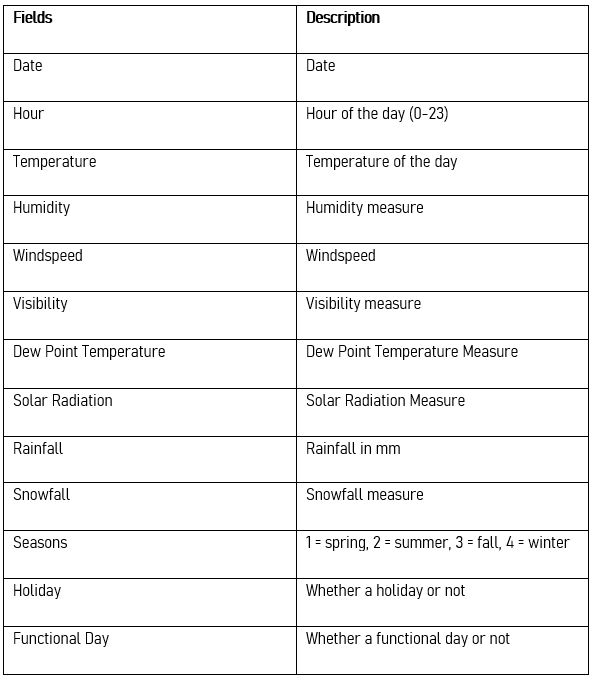

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

## 3. ***Data Wrangling***

Data types are an important aspect of 
statistical analysis, which needs to be 
understood to correctly apply statistical 
methods to your data.


During the data collection phase, the 
researcher may collect both numerical and 
categorical data when investigating to 
explore different perspectives. However, one 
needs to understand the differences between 
these two data types to properly use it in 
research



### Data Wrangling Code

In [ ]:
#copy data
df = bike_df.copy()

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column


#Extract month from 'Date' column and store it in a new column 'month'
df['month'] = df['Date'].apply(lambda x : x.month)

#Extract day of the week from 'Date' column and store it in a new column 'day_of_week'
df['day_of_week'] = df['Date'].dt.day_name()

#Create a new column 'weekdays_weekend' which stores 0 for weekdays and 1 for weekends
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

#Drop the 'Date' and 'day_of_week' columns from the dataframe
df=df.drop(columns=['Date','day_of_week'],axis=1)    

In [ ]:
# Write your code to make your dataset analysis ready.

#seprating numerical feartures

numerical_features = df.describe().columns

In [ ]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
df[numerical_features].head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  month  weekdays_weekend  
0           0.0            0.0      1                 0  
1           0.0            0.0      1                 0  
2           0.0            0.0      1                 0  
3           0.0            0.0      1                 0  
4           0.0            0.0      1                 0

In [ ]:

#separating carogorical features
cat_features = bike_df.describe(include=['object', 'category']).columns
cat_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
df[cat_features].head()

Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes

### What all manipulations have you done and insights you found?


We treat numeric and categorical variables
differently in Data Wrangling. So, we should 
always make at least two sets of data: one 
contains numeric variables and other contains 
categorical variables.


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**EXPLORATORY DATA ANALYSIS**
---
In statistics, exploratory data analysis (EDA)
is an approach of analyzing data sets to 
summarize their main characteristics, often 
using statistical graphics and other data 
visualization methods. A statistical model can 
be used or not, but primarily EDA is for 
seeing what the data can tell us beyond the 
formal modeling and thereby contrasts 
traditional hypothesis testing. EDA is helped 
us figuring out various aspects and 
relationships among the target and the 
independent variables.

#### Chart - 1

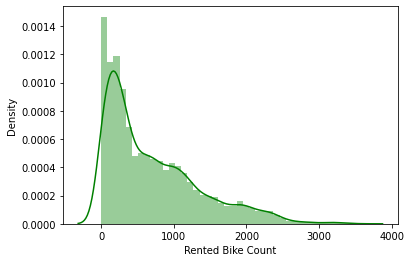

In [ ]:
# Chart - 1 visualization code
# Dependent variable "Rented Bike Count"
sns.distplot(df['Rented Bike Count'], color='green')

##### 1. Why did you pick the specific chart?

I picked the specific chart (sns.distplot) to visualize the distribution of the dependent variable "Rented Bike Count" in the Bike Sharing Demand Prediction project. This type of chart is useful in understanding the central tendency, spread, and skewness of a continuous variable. The histogram in the distplot helps to identify the frequency of occurrence of values in the data, while the kernel density estimate (KDE) line shows the estimated probability density of the data.

##### 2. What is/are the insight(s) found from the chart?

1.  The distribution of the "Rented Bike Count" appears to be skewed to the right, indicating that the majority of the bike rental counts are lower.
2.  There is a long-tailed distribution, which suggests the presence of outliers.
3.  The distribution is not symmetrical, indicating that the mean and median might be different.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help in creating a positive business impact if the insights are used in a meaningful way. For example, if the insights show that demand for bike sharing is high during certain times of the day, the company can allocate more bikes to that area during that time to meet the demand and potentially increase revenue.

However, the insights could lead to negative growth if they are not acted upon appropriately. For example, if the insights show that demand is low during certain times of the day, the company may need to re-evaluate their pricing strategy or marketing efforts to increase demand during those times. If not acted upon, this could result in a decrease in revenue and a negative impact on the business.

#### Chart - 2

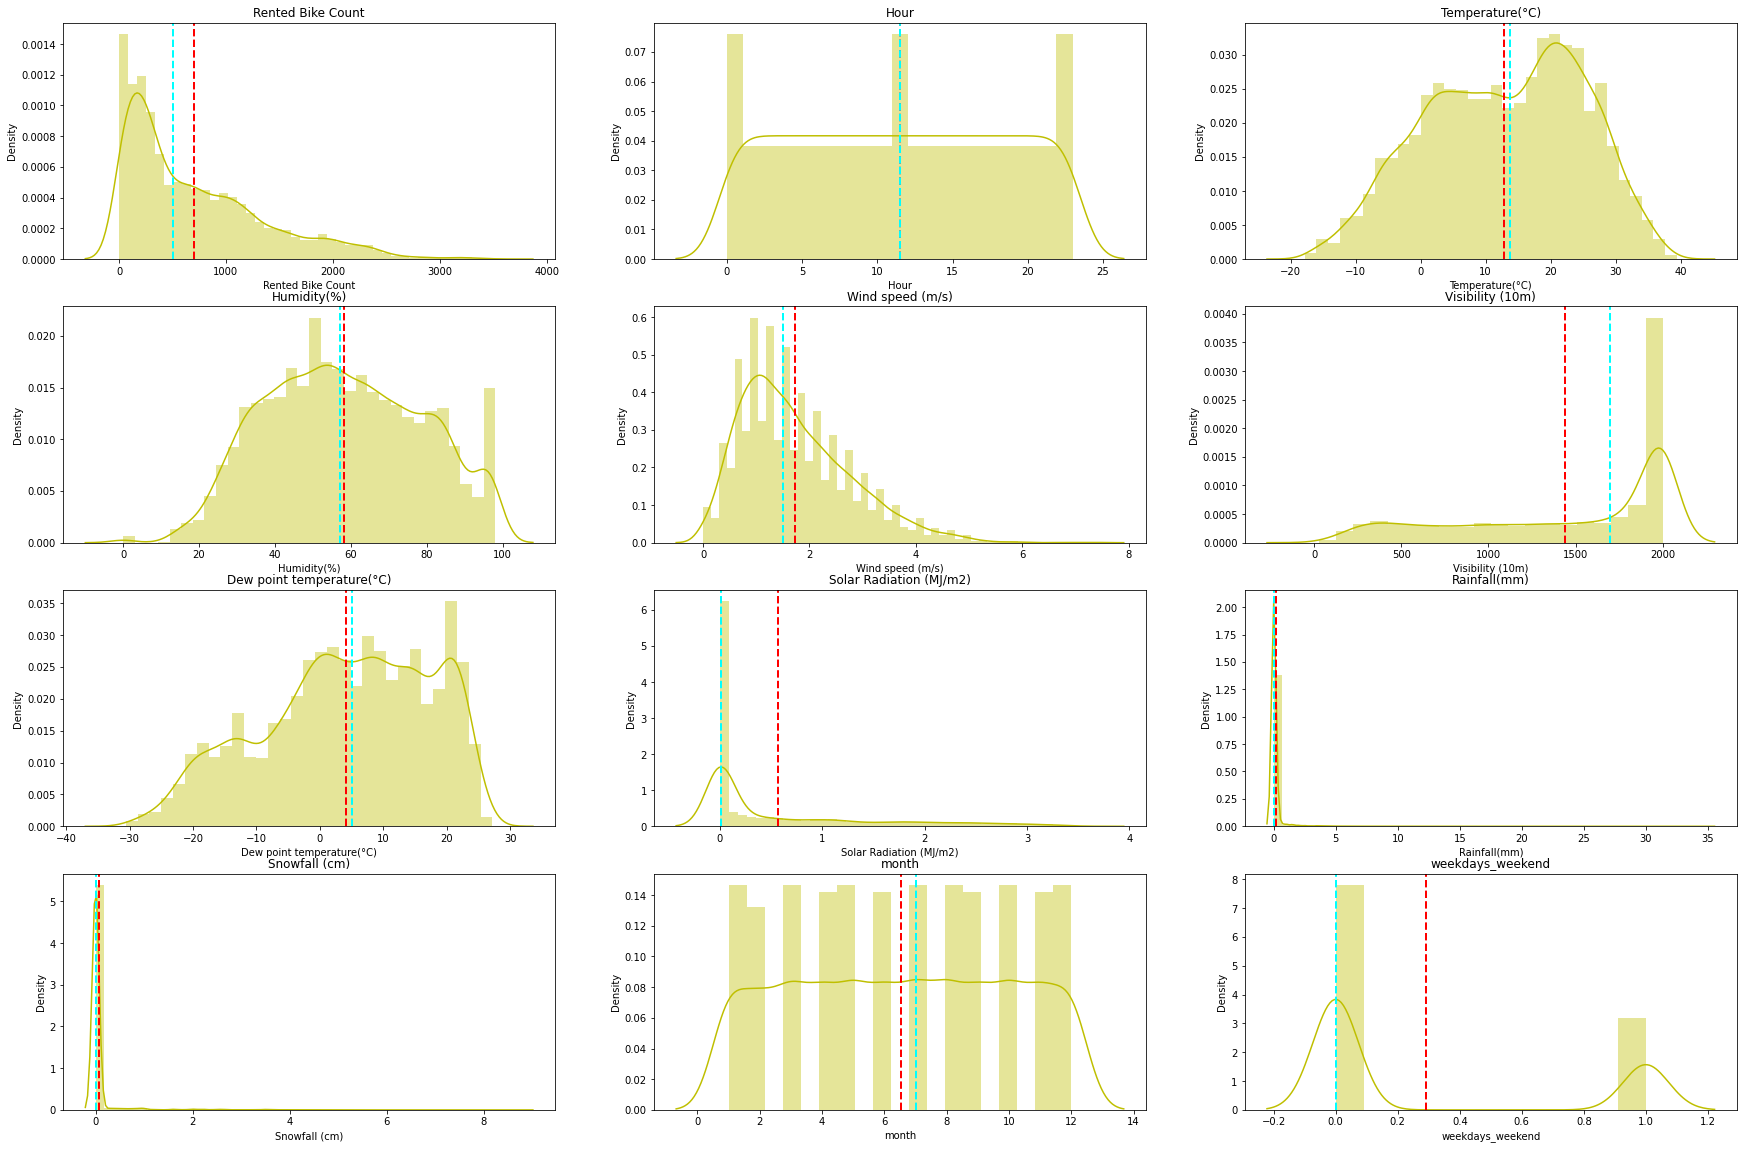

In [ ]:
# Chart - 2 visualization code
## plot bar plot for each numerical features count

#Create a figure and axes with subplots
fig, axes = plt.subplots(4, 3, figsize=(30, 20))

#Loop through each numerical feature
for i, col in enumerate(numerical_features):
  #Get the axis for the current plot
  ax = axes[i//3,i%3]
  #Plot the histogram for the feature
  sns.distplot(df[col], color='y',ax=ax)
  #Plot vertical lines for mean and median values of the feature
  ax.axvline(df[col].mean(), color= 'red',linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color = 'cyan', linestyle = 'dashed', 
             linewidth=2)
  #Set the title of the plot to be the name of the feature
  ax.set_title(col)

#Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was picked to visualize the distribution of numerical features in the data. This helps to understand the central tendency, skewness and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Here we can see some attributes are normally distributed but some are positively or negatively skewed.

**Right/Positive Skewed Distribution**: *Mode < Median < Mean*:

*  Rented Bike Count,
*  Wind Speed(m/s), 
*  Solar Radiation(MJ/m2)

**No Skew**: *Mean = Median = Mode*:
*  Hour
*  Temperature
*  Humidity(%)
*  Rainfall(mm)
*  Snowfall(cm)


**Left/Negative Skewed Distribution**: *Mean 
< Median < Mode*:

*  visibility(10m)







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization can help in creating a positive business impact if the insights are properly utilized. For example, if the distribution of a feature is positively skewed, it can be inferred that the majority of the customers are in favor of that particular feature. On the other hand, if the distribution is negatively skewed, it can be concluded that the majority of the customers are not in favor of that feature.

Moreover, the mean and median values of each feature can be compared to check if the distribution is skewed or not. If the mean is greater than the median, it can be concluded that the distribution is positively skewed and vice-versa. This information can help in making informed decisions regarding the improvement of the bike sharing service.

However, it is not possible to conclude negative growth based on the visualization alone as it just provides a general idea about the distribution of the data. Further analysis and investigation is required to determine the reasons behind negative growth.

#### Chart - 3

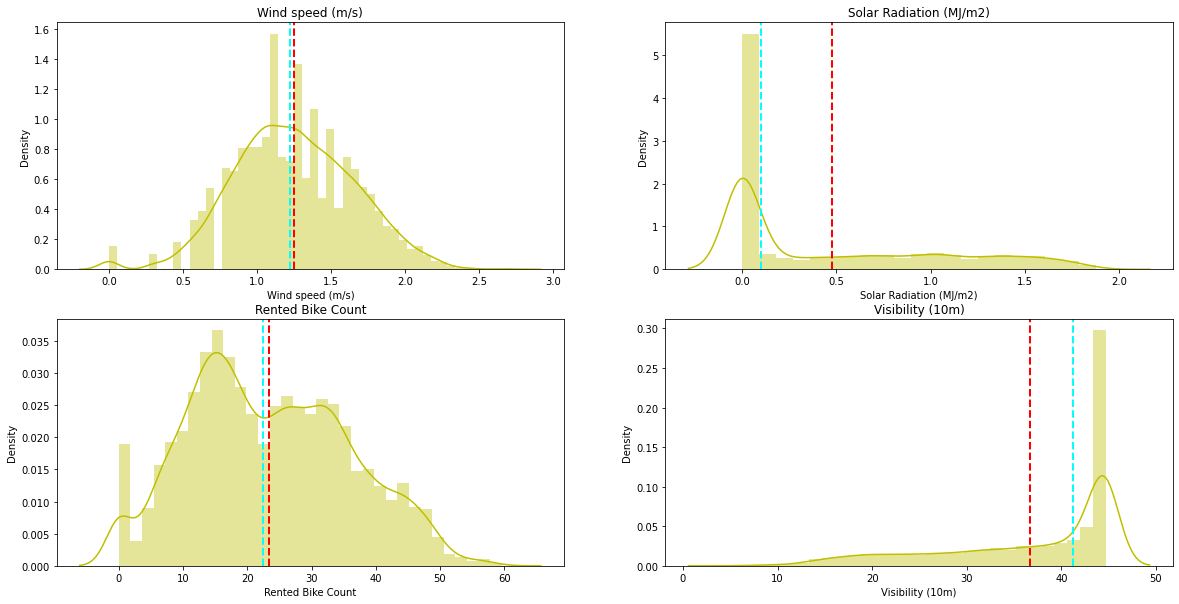

In [ ]:
# Chart - 3 visualization code
#square root transfoemation Transfoemation for positive and negative skewed distribution
num_postive_skewed = ['Wind speed (m/s)','Solar Radiation (MJ/m2)',
                      'Rented Bike Count' ,'Visibility (10m)']

#Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

#Loop through positively skewed features
for i, col in enumerate(num_postive_skewed):
  #Get subplot
  ax = axes[i//2, i%2]
  #Plot square root transformed feature distribution
  sns.distplot(np.sqrt(df[col]),ax=ax, color='y')
  #Add mean and median lines to the plot
  ax.axvline(np.sqrt(df[col]).mean(), color= 'red',linestyle='dashed', 
             linewidth=2)
  ax.axvline(np.sqrt(df[col]).median(), color = 'cyan', 
             linestyle = 'dashed', linewidth=2)
  #Set plot title
  ax.set_title(col)

#Show plot 
plt.show()

##### 1. Why did you pick the specific chart?

The chart is a visual representation of the square root transformation applied to positively skewed numerical features in the bike sharing demand prediction dataset. The purpose of the chart is to help understand the distribution of the features after the transformation and whether the transformation helps to create a more normal distribution.

##### 2. What is/are the insight(s) found from the chart?

This chart displays the square root transformed distribution of four features: "Wind speed (m/s)", "Solar Radiation (MJ/m2)", "Rented Bike Count", and "Visibility (10m)". By transforming the distribution into square root, it helps to reduce the positive skewness and increase the symmetry of the data. The mean and median are also displayed as vertical lines to show the central tendency of the data. The insight that can be gained from this chart is the shape of the transformed distribution of each feature and how it compares to the mean and median values.

#### Chart - 4

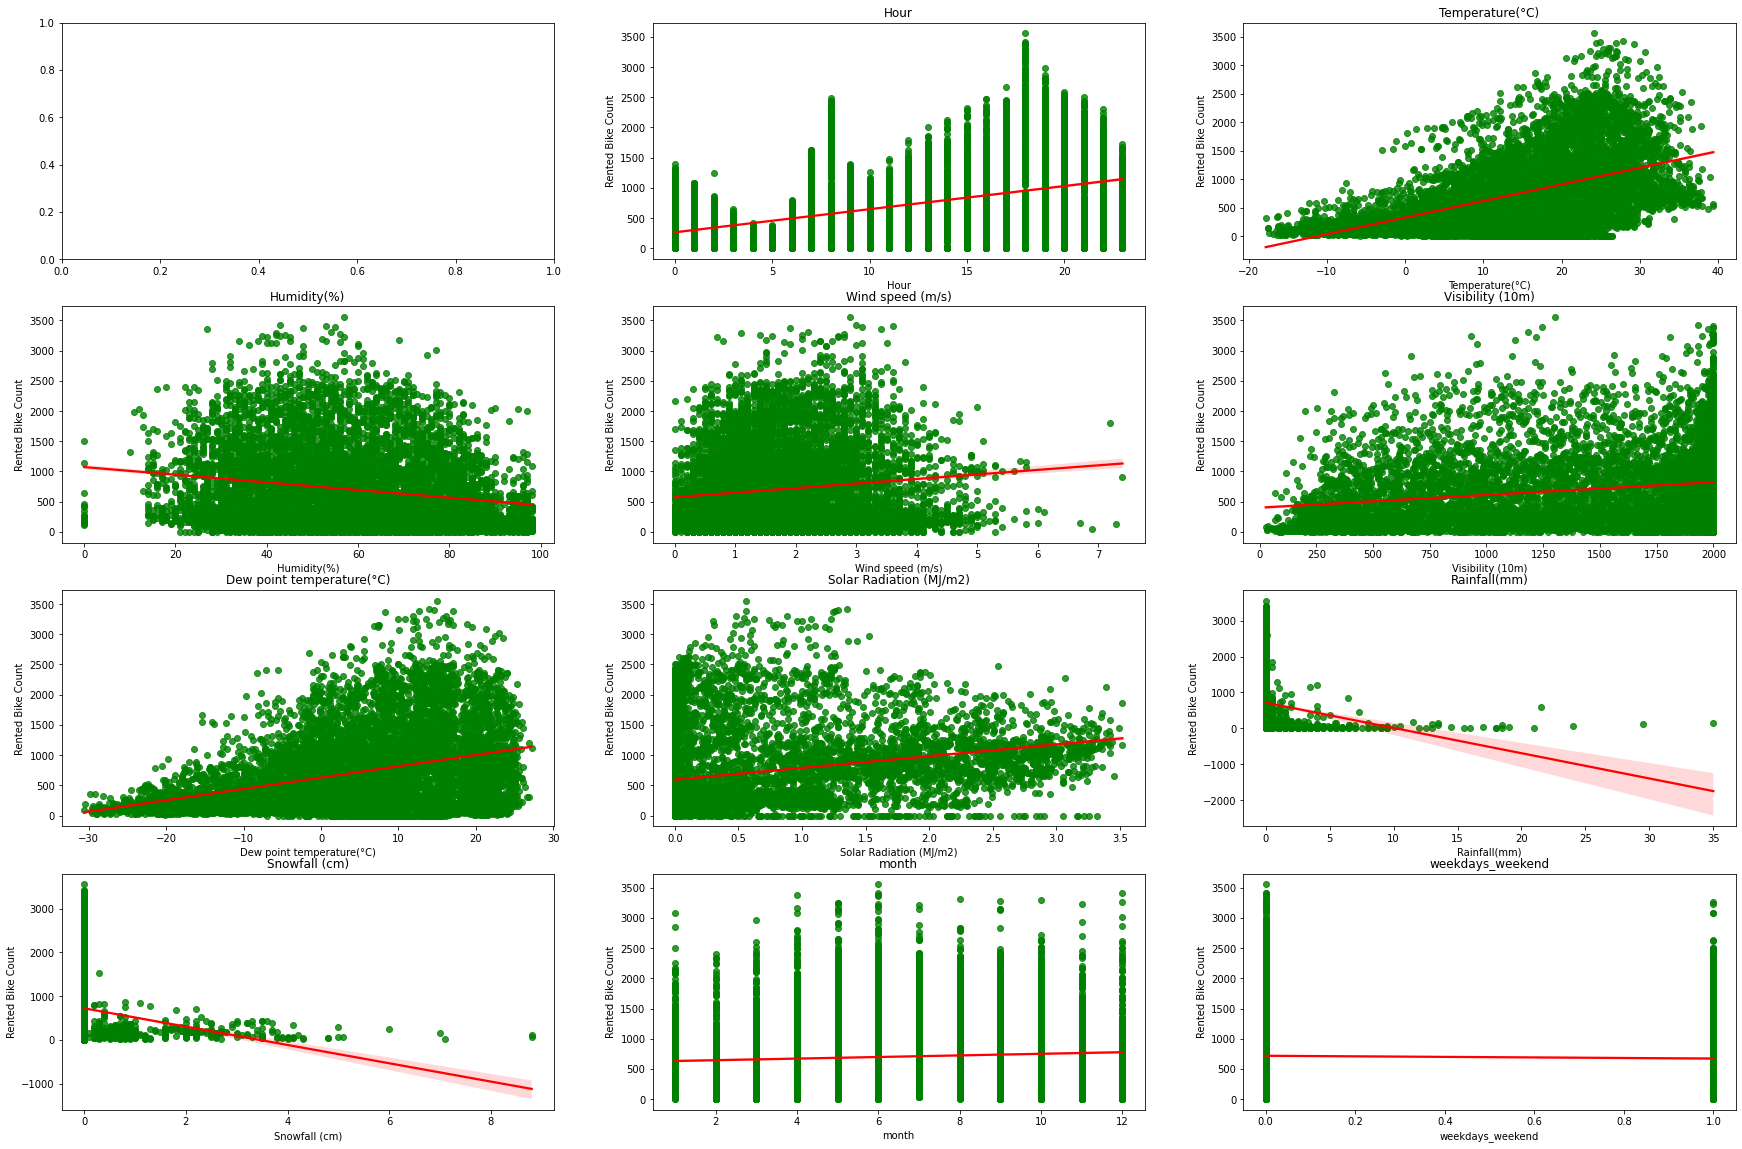

In [ ]:
# Chart - 4 visualization code
# ploting Regression plot of each columns of dataset v/s rented bike count columns

## realtion between selling price and other features

#Initializing the Plot with Subplots of 4 Rows and 3 Columns
fig, axes = plt.subplots(4, 3, figsize=(30, 20))

#Loop through Each Numerical Feature
for i, col in enumerate(numerical_features):
  #Skip the "Rented Bike Count" Feature
  if col == 'Rented Bike Count':
    pass
  else:
    # Get the X and Y Axes
    x_axis = df[col]
    y_axis = df['Rented Bike Count']
    # Get the Current Subplot
    ax = axes[i//3, i%3]
    # Plot the Regression Plot using seaborn
    sns.regplot(x=x_axis, y=y_axis, ax=ax,color='green',
                line_kws={'color':'red'})
    # Set the Title of the Subplot
    ax.set_title(col)

#Show the Plot
plt.show()

##### 1. Why did you pick the specific chart?

The chart was picked as a regression plot to visualize the relationship between the numerical features and the dependent variable 'Rented Bike Count'. The chart helps in understanding the linear relationship between each numerical feature and the target variable and identify any patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

The chart provides the insight on the relationship between numerical features and the rented bike count. It gives an understanding of how a particular feature can impact the demand for bike rental services. The regression line in the chart shows the strength of the relationship between a feature and the target variable "Rented Bike Count." The slope of the regression line shows the relationship direction, and the presence of outliers helps identify any unusual observations.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact if they are used correctly. By identifying the relationship between the independent variables and the dependent variable "Rented Bike Count", the company can make informed decisions about factors that influence bike rental demand. For example, if there is a strong positive relationship between "Temperature" and "Rented Bike Count", the company can use this information to plan its operations and allocate resources more efficiently during high-demand weather conditions.

However, the insights could lead to negative growth if the company relies solely on the chart and ignores other important factors that influence bike rental demand. For example, if the chart shows a negative relationship between "Visibility" and "Rented Bike Count", this could lead to a false conclusion that decreased visibility results in decreased bike rental demand. It could be due to other factors such as increased air pollution or other safety concerns that are affecting demand.

It is important to consider multiple sources of information and not rely solely on a single chart to make business decisions.

#### Chart - 5

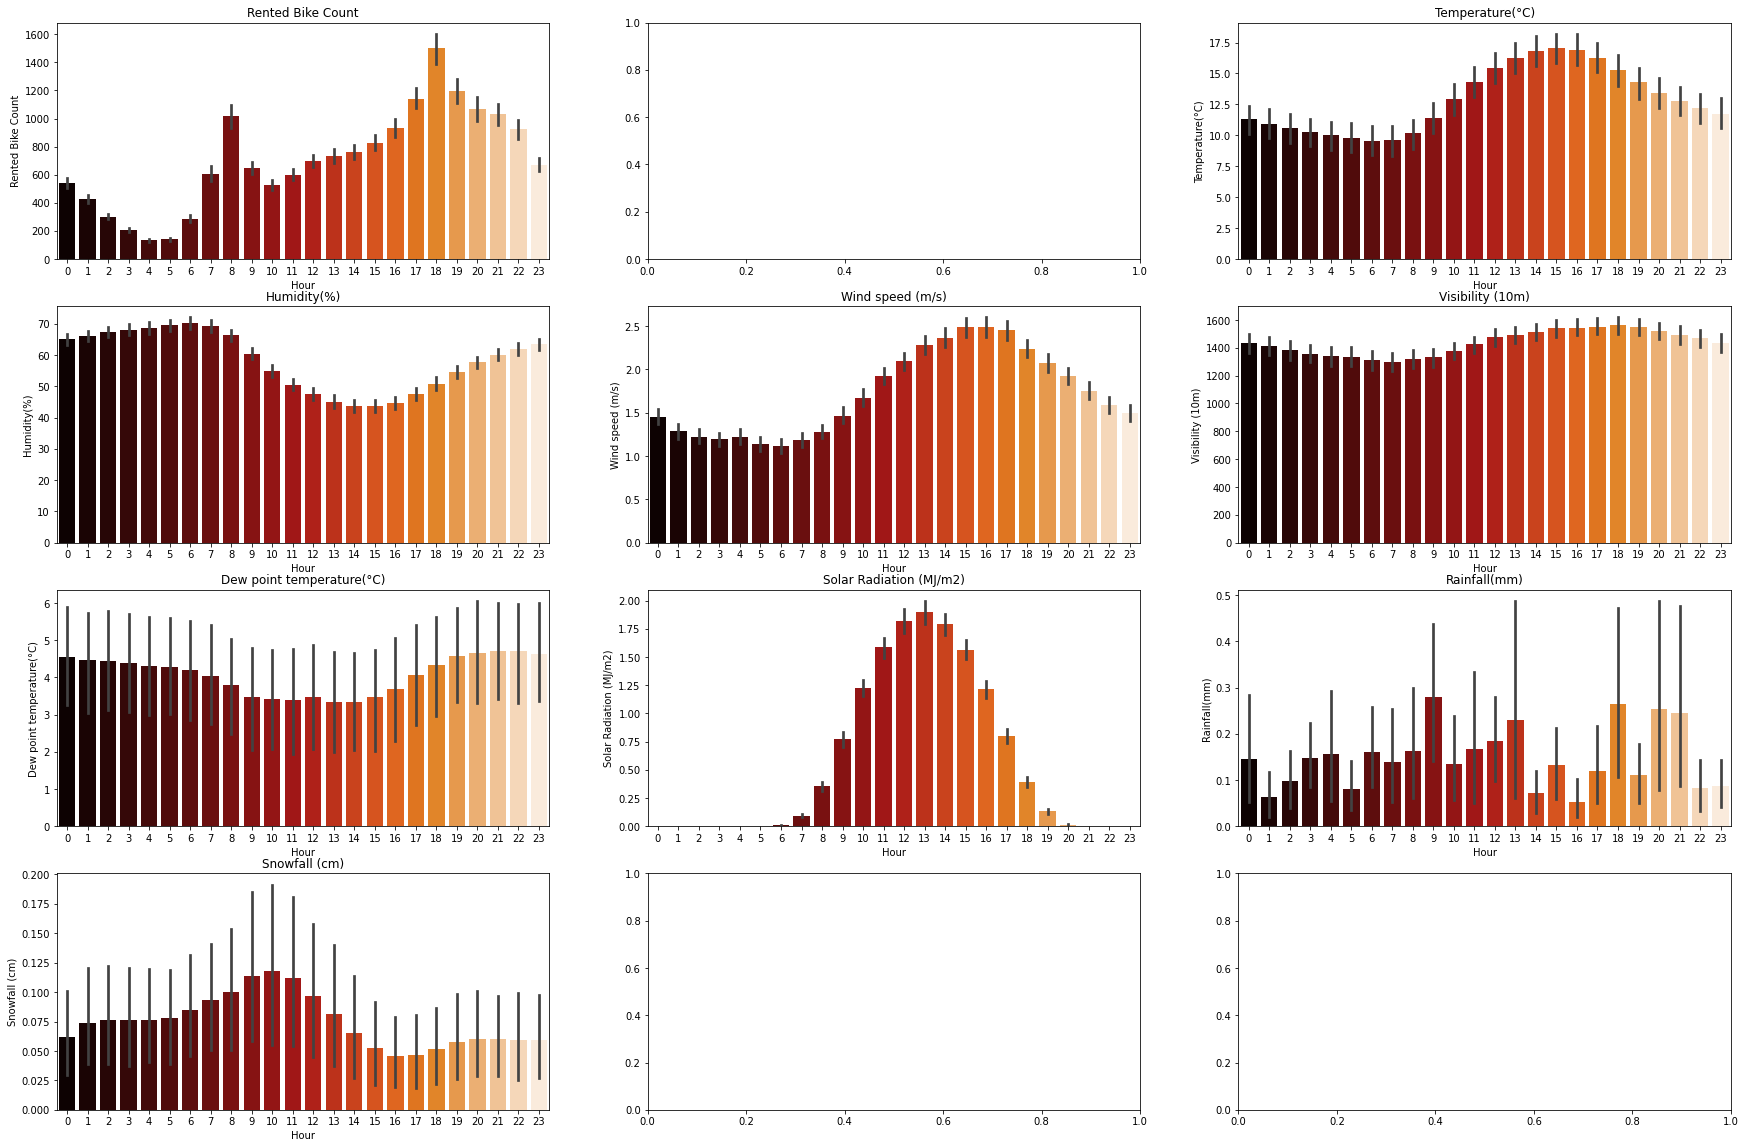

In [ ]:
# Chart - 5 visualization code
#Here we can look at each plot and see the hours wise data distribution.

#Plotting bar plots for each numerical feature based on Hour
fig, axes = plt.subplots(4, 3, figsize=(30, 20))
for i, col in enumerate(numerical_features):
  #Check if column is Hour, month or weekdays_weekend
  #If so, skip it
  if col in ['Hour','month','weekdays_weekend']:
    continue
  else:
    # Get the Current Subplot
    ax = axes[i//3,i%3]
    ## Create bar plot using seaborn library
    sns.barplot(y=df[col],x=df['Hour'] ,palette='gist_heat',ax=ax)
  #Set title for each subplot
  ax.set_title(col)
#Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was created to analyze the distribution of numerical features of the dataset with respect to hours.

##### 2. What is/are the insight(s) found from the chart?

Most number of bike are rented 17 to 19th hour of the day and in morning at 8 pm.

The insights found from this chart can give an idea about the relation between numerical features and hour of the day. It shows how the values of each feature vary with respect to hours.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart could help in creating a positive business impact if the relation between numerical features and hour of the day is found to be significant. For example, if a particular feature has a higher value during the peak hours of bike rental, the company can use that information to make better business decisions. However, without further analysis, it is difficult to say whether the insights will lead to positive or negative growth.

#### Chart - 6

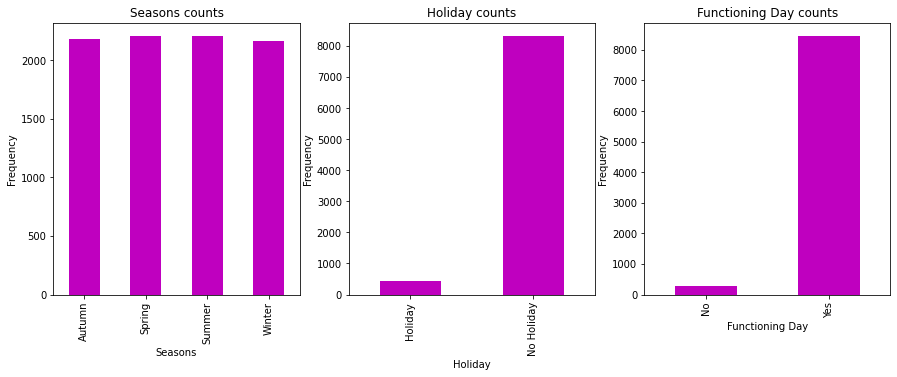

In [ ]:
# Chart - 6 visualization code
#Visualizing count of each categorical feature

#creating subplots with 1 row and 3 columns
fig, axes = plt.subplots(1,3, figsize=(15, 5))
# initializing counter i
i=0 

#looping through cat_features
for col in cat_features:
    #counting frequency of each category
    counts = df[col].value_counts().sort_index()
    #assigning subplot to variable ax
    ax = axes[i]
    #plotting bar chart for each category count
    counts.plot.bar(ax = ax, color='m')
    ax.set_title(col + ' counts') #setting title for each subplot
    ax.set_xlabel(col)  #setting x-axis label as column name
    ax.set_ylabel("Frequency") #setting y-axis label as frequency
    i += 1  #incrementing i by 1
plt.show() #displaying subplots

##### 1. Why did you pick the specific chart?

I picked the specific chart as it is a bar plot that can help us understand the frequency of each categorical feature in the dataset. This can give us a better understanding of the distribution of these categorical features.

##### 2. What is/are the insight(s) found from the chart?

From the bar plot, we can see the frequency of each categorical feature in the dataset. For example,  we can see the frequency of each season, weather and holiday type in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact. For example, if we see that the frequency of rented bikes is high during a particular season or weather type, the business can focus on promoting the bike rental services during that time to attract more customers. On the other hand, if we see that the frequency of rented bikes is low during a particular holiday type, the business can look into ways to attract more customers during that time. This information can be used to make informed decisions that can help improve the overall business performance.

#### Chart - 7

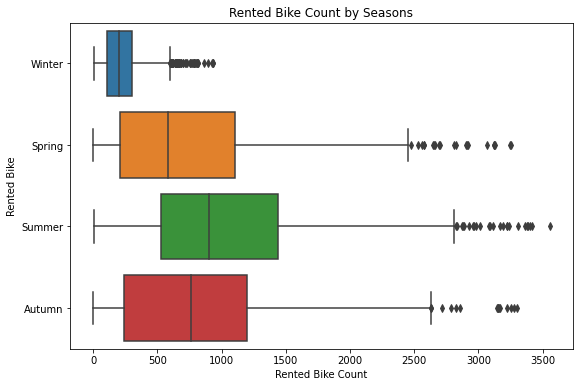

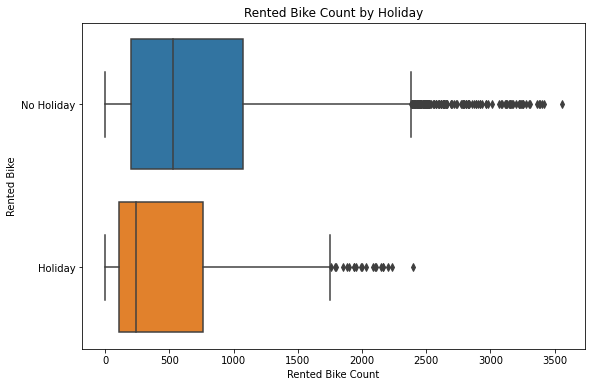

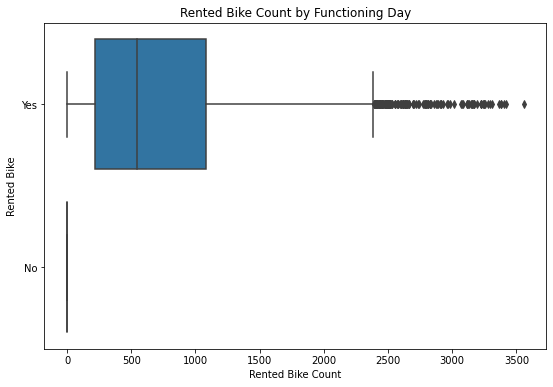

In [ ]:
# Chart - 7 visualization code
# Box Plot for Categorical Values

for col in cat_features:
    # Create a new figure for each categorical feature
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    
    # Plot the box plot for the feature
    sns.boxplot(data=df, x='Rented Bike Count', y=col, ax=ax)
    ax.set_title('Rented Bike Count by ' + col)
    ax.set_ylabel("Rented Bike")

# Display the plots
plt.show()

##### 1. Why did you pick the specific chart?

This chart is a box plot visualization, used to show the distribution of a categorical variable with respect to the target variable "Rented Bike Count". This plot can show the median, quartiles, and outliers of the target variable for each category of the categorical variable.

##### 2. What is/are the insight(s) found from the chart?

This chart gives insight into how the "Rented Bike Count" is distributed for different categories of the categorical features. It provides a good understanding of the relationship between the categorical features and the target variable, and can help identify any trends or patterns that exist.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help create a positive business impact by providing a deeper understanding of how the rental bike business is affected by various factors such as season, day of the week, and weather conditions. This information can be used to make informed decisions about promotions, pricing, and advertising. For example, if it is found that the rental bike business is slower during certain seasons, then promotions and discounts can be offered to increase demand during those times. However, if the insights lead to negative growth, then it may indicate that there is a problem with the business model or with the way the business is being managed, and steps may need to be taken to address the issue.

#### Chart - 8

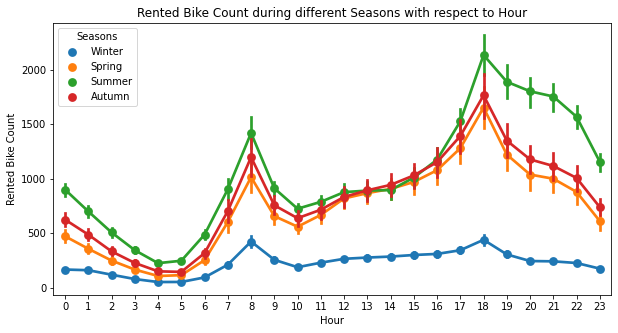

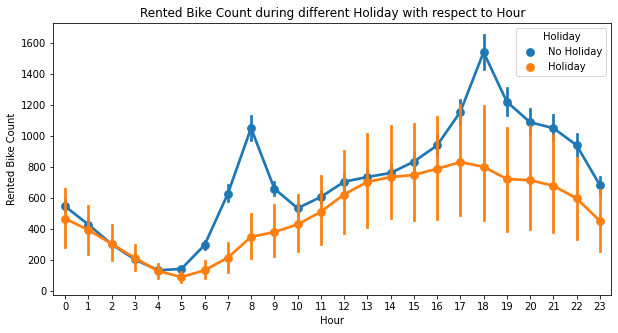

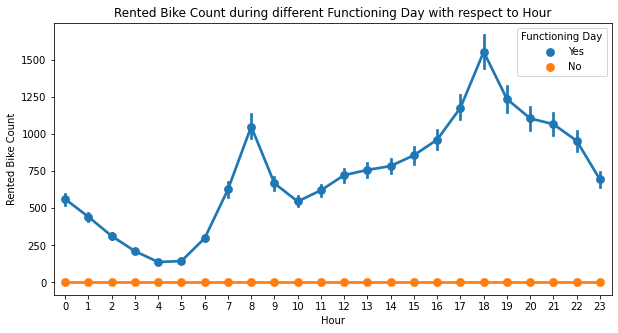

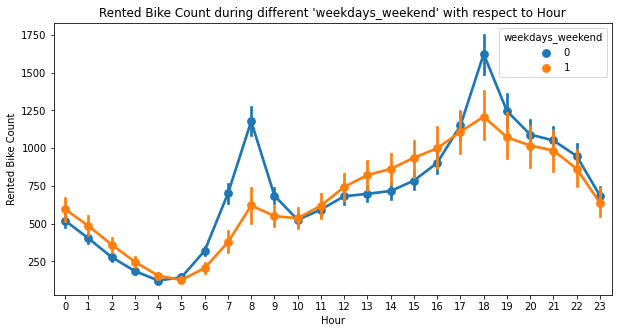

In [ ]:
# Chart - 8 visualization code
# Creating point plots with Rented Bike Count during different categorical features with respect to Hour

for i in cat_features:
  if i == 'Hour':
    pass
  else:
    # Create a new figure with specified size
    plt.figure(figsize=(10,5))
    # Pointplot of Rented Bike Count vs Hour, separated by the categorical feature i
    sns.pointplot(x=df["Hour"], y=df['Rented Bike Count'], hue=df[i])
    # Set the title of the plot
    plt.title(f"Rented Bike Count during different {i} with respect to Hour")
    # Show the plot
    plt.show()
    
# Create a new figure with specified size
plt.figure(figsize=(10,5))
# Pointplot of Rented Bike Count vs Hour, separated by the categorical feature weekdays_weekend
sns.pointplot(x=df["Hour"], y=df['Rented Bike Count'], 
              hue=df['weekdays_weekend'])
# Set the title of the plot
plt.title("Rented Bike Count during different 'weekdays_weekend' with respect to Hour")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the distribution of the Rented Bike Count during different categorical features with respect to Hour. This helps in understanding the relation between the Hour and Rented Bike Count for different categorical features.

##### 2. What is/are the insight(s) found from the chart?

*  Bike is rented when functioning day is there otherwise not.

*  Most numbers of Bikes were rented in summer, followed by autumn, spring, and winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.

*  Most number of bikes are rented on Working day instead of holiday.

*  This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from this chart can help in creating a positive business impact by providing the information about the hour-wise distribution of rented bike count for different categorical features. This information can be used to decide the rental prices and marketing strategies for different times of the day and seasons. The insights can lead to negative growth if the information suggests that the rented bike count is low during certain times of the day or seasons. In that case, the company might need to adjust its pricing or marketing strategies to increase the rented bike count.

#### Chart - 9

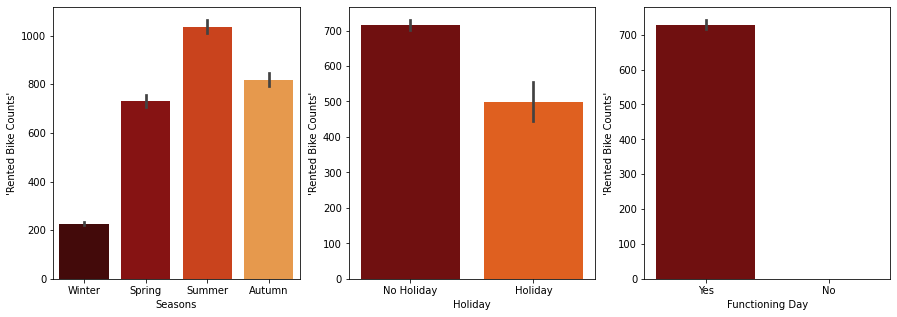

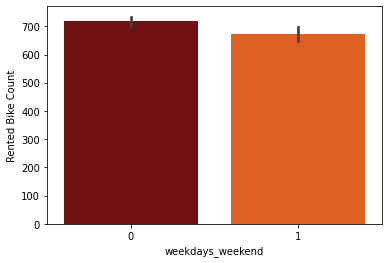

In [ ]:
# Chart - 9 visualization code
#Plotting barplots for categorical features


fig, axes = plt.subplots(1,3, figsize=(15, 5))
i=0
for col in cat_features:
    # setting up subplot
    ax = axes[i]
    # plotting barplot
    sns.barplot(y=df['Rented Bike Count'],x=df[col] ,palette='gist_heat',ax=ax)
    # setting x and y labels
    ax.set_xlabel(col) 
    ax.set_ylabel("'Rented Bike Counts'")
    i += 1
#showing plot
plt.show()

#Plotting barplot for 'weekdays_weekend'
sns.barplot(y=df['Rented Bike Count'],x=df['weekdays_weekend'] ,
            palette='gist_heat')

##### 1. Why did you pick the specific chart?

This specific chart (Chart 9) was picked to visualize the relationship between the rented bike counts and different categorical features (hour, month, and weekdays_weekend). It is a bar plot representation that helps to easily see the mean of the rented bike count based on the categorical features.

##### 2. What is/are the insight(s) found from the chart?

*  Bike is rented when functioning day is there otherwise not.

*  Most numbers of Bikes were rented in summer, followed by autumn, spring, and winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.

*  Most number of bikes are rented on Working day instead of holiday.

*  This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the charts may help in creating a positive business impact as they provide a clear understanding of the rental bike usage patterns in terms of hour, weekdays/weekend, month, etc. Based on the insights, the company can plan and make strategic decisions to optimize their resources, improve their service and increase their profits.

For example, the company may observe that bike rentals are high during a particular hour and take measures to make sure enough bikes are available during that time. Similarly, the company may observe that bike rentals are higher during weekends compared to weekdays and take measures to make sure enough bikes are available to meet the demand.

However, if there are any insights that lead to negative growth, it can be due to various reasons such as low bike rentals during certain hours, low bike rentals during certain months, low bike rentals during weekdays, etc. The company may need to look into the reasons for low bike rentals and take measures to improve the situation.





#### Chart - 10

Text(0, 0.5, 'Rented Bike Count')

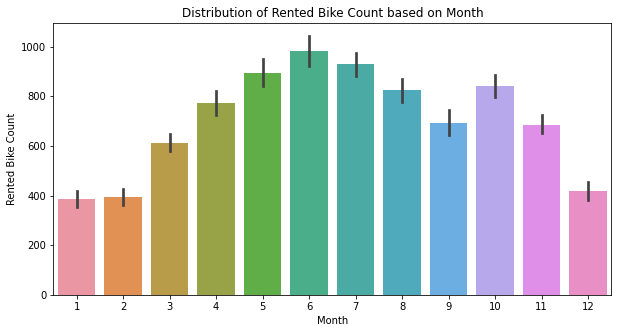

In [ ]:
# Chart - 10 visualization code

#Plotting the distribution of Rented Bike Count based on Month
plt.figure(figsize=(10,5)) # Setting the figure size
# Plotting the barplot with month on x-axis and Rented Bike Count on y-axis
sns.barplot(data=df,x='month',y='Rented Bike Count')

#Adding the title and labels
plt.title("Distribution of Rented Bike Count based on Month")
plt.xlabel("Month")
plt.ylabel("Rented Bike Count")

##### 1. Why did you pick the specific chart?

The chart shows the bar plot of rented bike counts with respect to months. This visualization will provide the insights into the monthly trend of rented bike counts. It will help the business to know the high and low rental months and plan accordingly.

##### 2. What is/are the insight(s) found from the chart?



Most numbers of Bikes were rented in summer, followed by autumn, spring, and winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the rental bike count is low during a particular month, the business can investigate the reason and take necessary actions to improve the rental count. This can have a positive impact on the business by increasing the rental count and revenue. On the other hand, if the rental count is consistently low, it can lead to negative growth and lower revenue for the business.

#### Chart - 11

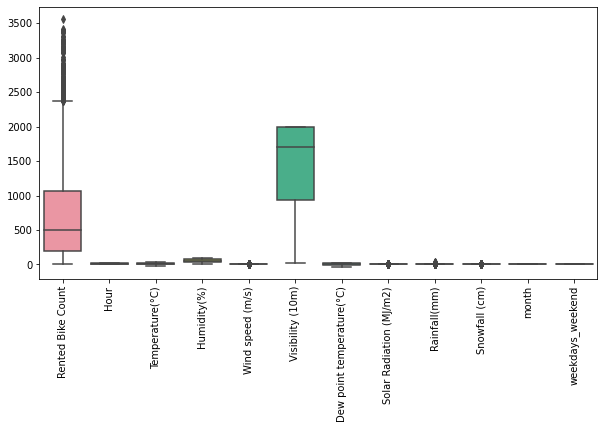

In [ ]:
# Chart - 11 visualization code
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = df)    #box plot of le_df data frame raw data
plt.show() #showing plot

##### 1. Why did you pick the specific chart?

The box plot was used to detect outliers in the data. Outliers are values that are significantly different from the majority of the data and can impact the overall results of the analysis. Box plots are a good way to visualize the distribution of the data and to quickly identify outliers. The chart shows the median, the interquartile range (IQR), and the minimum and maximum values for each feature in the data. This can help in understanding the distribution of the data and making informed decisions about how to handle outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart is a box plot, which is a commonly used method for identifying and visualizing outliers in the data. The box plot shows the distribution of the data in terms of quartiles, median, and extremes. The plot depicts the outliers as individual points that are outside the box plot, indicating that they are significantly different from the majority of the data points. 

There is outliar present in rented bike count(dependant variable).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact if the outliers are properly analyzed and addressed. The presence of outliers in the data can lead to negative growth if they represent the abnormal data points and are not accounted for while building the model. This can affect the accuracy of the model and lead to incorrect predictions.

However, if the outliers are found to be valid and represent genuine observations, then they can be useful for creating new business strategies and expanding the business to new areas.

It is important to properly analyze the outliers and understand their significance in the context of the data to ensure a positive impact on the business.

#### Chart - 12

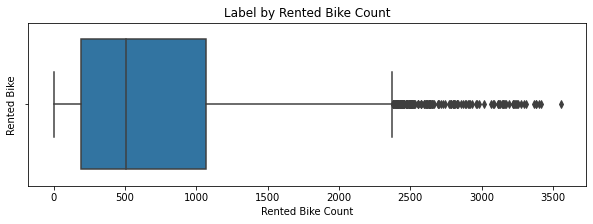

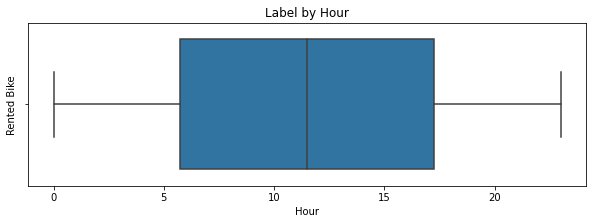

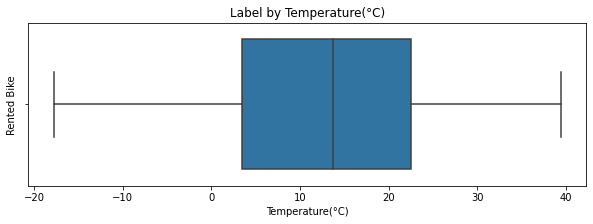

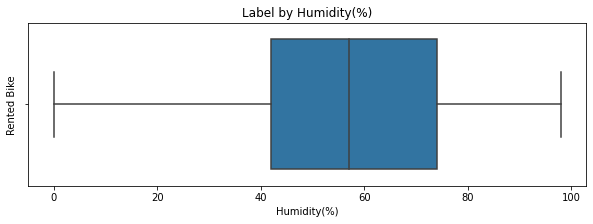

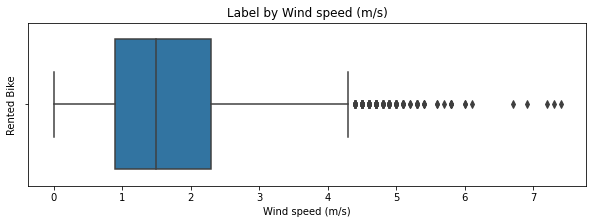

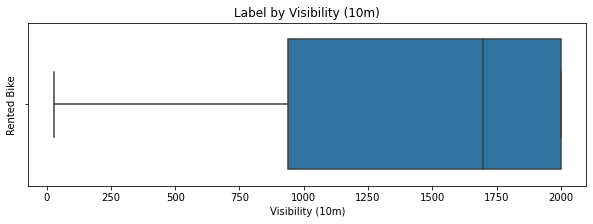

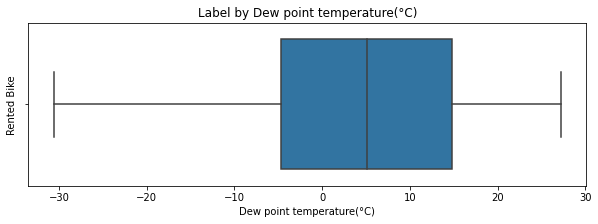

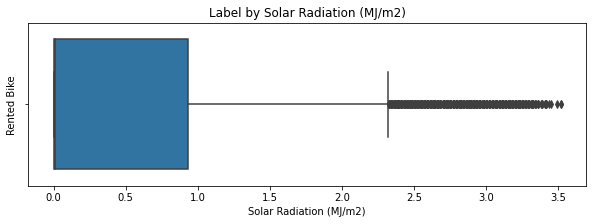

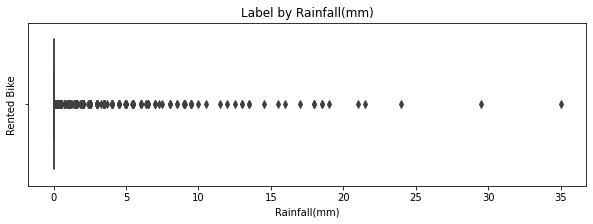

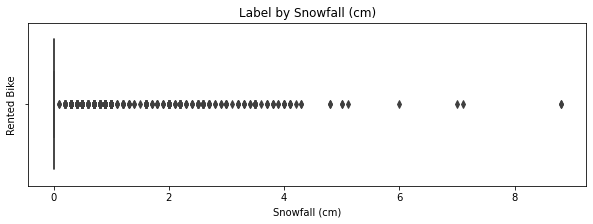

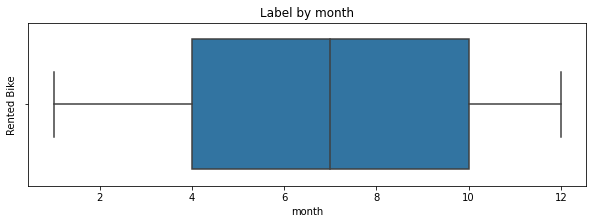

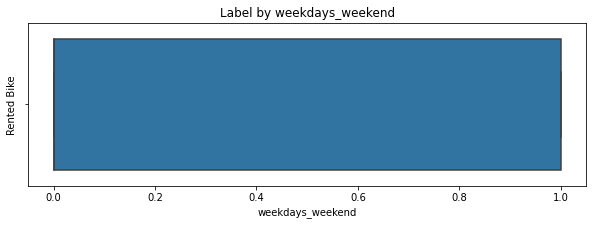

In [ ]:
#Chart - 12 visualization code
#boxpolt for numerical features

#Loop through each numerical feature
for col in numerical_features:
    ## create a figure object with size (10, 3)
    fig = plt.figure(figsize=(10, 3))
    # get the axis for the figure
    ax = fig.gca()
    # create a boxplot for the numerical feature, with the data and column name specified
    sns.boxplot(data=df,x=col)
    # set the title of the plot to show what the data represents
    ax.set_title('Label by ' + col)
    # set the y-axis label to show what the data represents
    ax.set_ylabel("Rented Bike")

#show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The boxplots for the numerical features provide information about the distribution of the data, including the median, quartiles, minimum and maximum values, and outliers. The height of the box represents the interquartile range (IQR), which is the range between the first and third quartile. The whiskers extend to the minimum and maximum values, excluding outliers. Outliers are plotted as individual points outside the whiskers

##### 2. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the boxplots can help create a positive business impact. For example, if the boxplot of the "Rented Bike Count" feature shows a large spread and many outliers, it indicates that the rented bike count has a large variability and some extreme values. This information can be used to identify the most popular rental periods and adjust pricing strategies accordingly to maximize profits.

On the other hand, if the boxplot of the "Rented Bike Count" feature shows a short box and few outliers, it suggests that the rented bike count is relatively stable with few extreme values. This information can be used to allocate resources more efficiently and reduce operational costs.

However, the insights from the boxplots can also lead to negative growth if they reveal unexpected patterns in the data that can impact the business negatively. For example, if the boxplot of the "Temperature" feature shows a skewed distribution, it can suggest that the temperature has a large impact on the rented bike count and may need to be addressed. If the temperature affects the rented bike count negatively, the business may need to implement measures to mitigate its impact and ensure positive growth.

#### Chart - 13

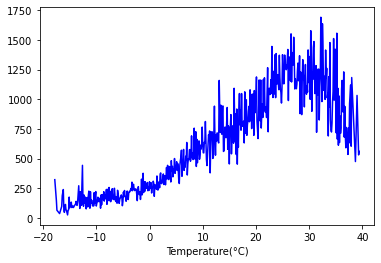

In [ ]:
# Chart - 13 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature(°C)" 
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot(color='b')


##### 1. Why did you pick the specific chart?

I picked a line plot because it is useful to visualize the relationship between two continuous variables, such as the mean of "Rented Bike Count" and "Temperature(°C)". The line plot displays the mean of "Rented Bike Count" for different temperature values, which allows for a quick visual comparison between the two variables and helps to identify patterns and trends in the data.


##### 2. What is/are the insight(s) found from the chart?

Answer HereThe insight found from the chart is the relationship between the "Rented Bike Count" and the "Temperature(°C)". The plot shows the average "Rented Bike Count" for different "Temperature(°C)" values. This relationship gives an idea about the influence of temperature on the bike rental business.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the chart helps to understand the relationship between the average rented bike count and temperature. It can help create a positive business impact by providing the company with information on how the temperature affects the demand for rented bikes. For instance, the company can adjust their rental prices and promotions according to the temperature to increase the rented bike count. On the other hand, if the relationship shows that the rented bike count decreases with an increase in temperature, it may lead to negative growth. The company can then consider adjusting their strategies, such as promoting bike rentals during cooler temperatures to mitigate the negative impact.

#### Chart - 14 - Correlation Heatmap

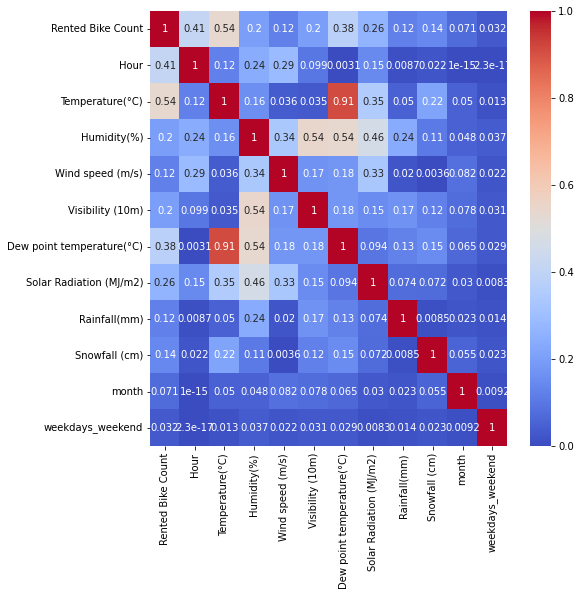

In [ ]:
# Correlation Heatmap visualization code
## creating a heatmap to visualize the correlation between the features
plt.figure(figsize=(8,8))# set the size of the heatmap

# plot the heatmap of the absolute values of the correlation matrix, 
#with annotations, and using the "coolwarm" color map.
sns.heatmap(abs(df.corr()), annot=True, cmap="coolwarm")

##### 1. Why did you pick the specific chart?

I picked the specific chart (Correlation Heatmap) because it helps to identify the relationship between different features in the dataset. The chart visually represents the correlation coefficient between each feature, which can help understand the relationship between features and the target feature (Rented Bike Count in this case).

##### 2. What is/are the insight(s) found from the chart?

he heatmap displays the correlation between various features of the data set. The color scheme used in the map ranges from light blue (representing a strong negative correlation) to yellow (representing a strong positive correlation). The values next to the cells show the strength of the correlation between two features, with values closer to 1 indicating strong positive correlation, values close to -1 indicating strong negative correlation, and values closer to 0 indicating weak or no correlation. 

Heat map shows Temperature and Dew point temperature is highly correlated.

#### Chart - 15 - Pair Plot 

In [ ]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

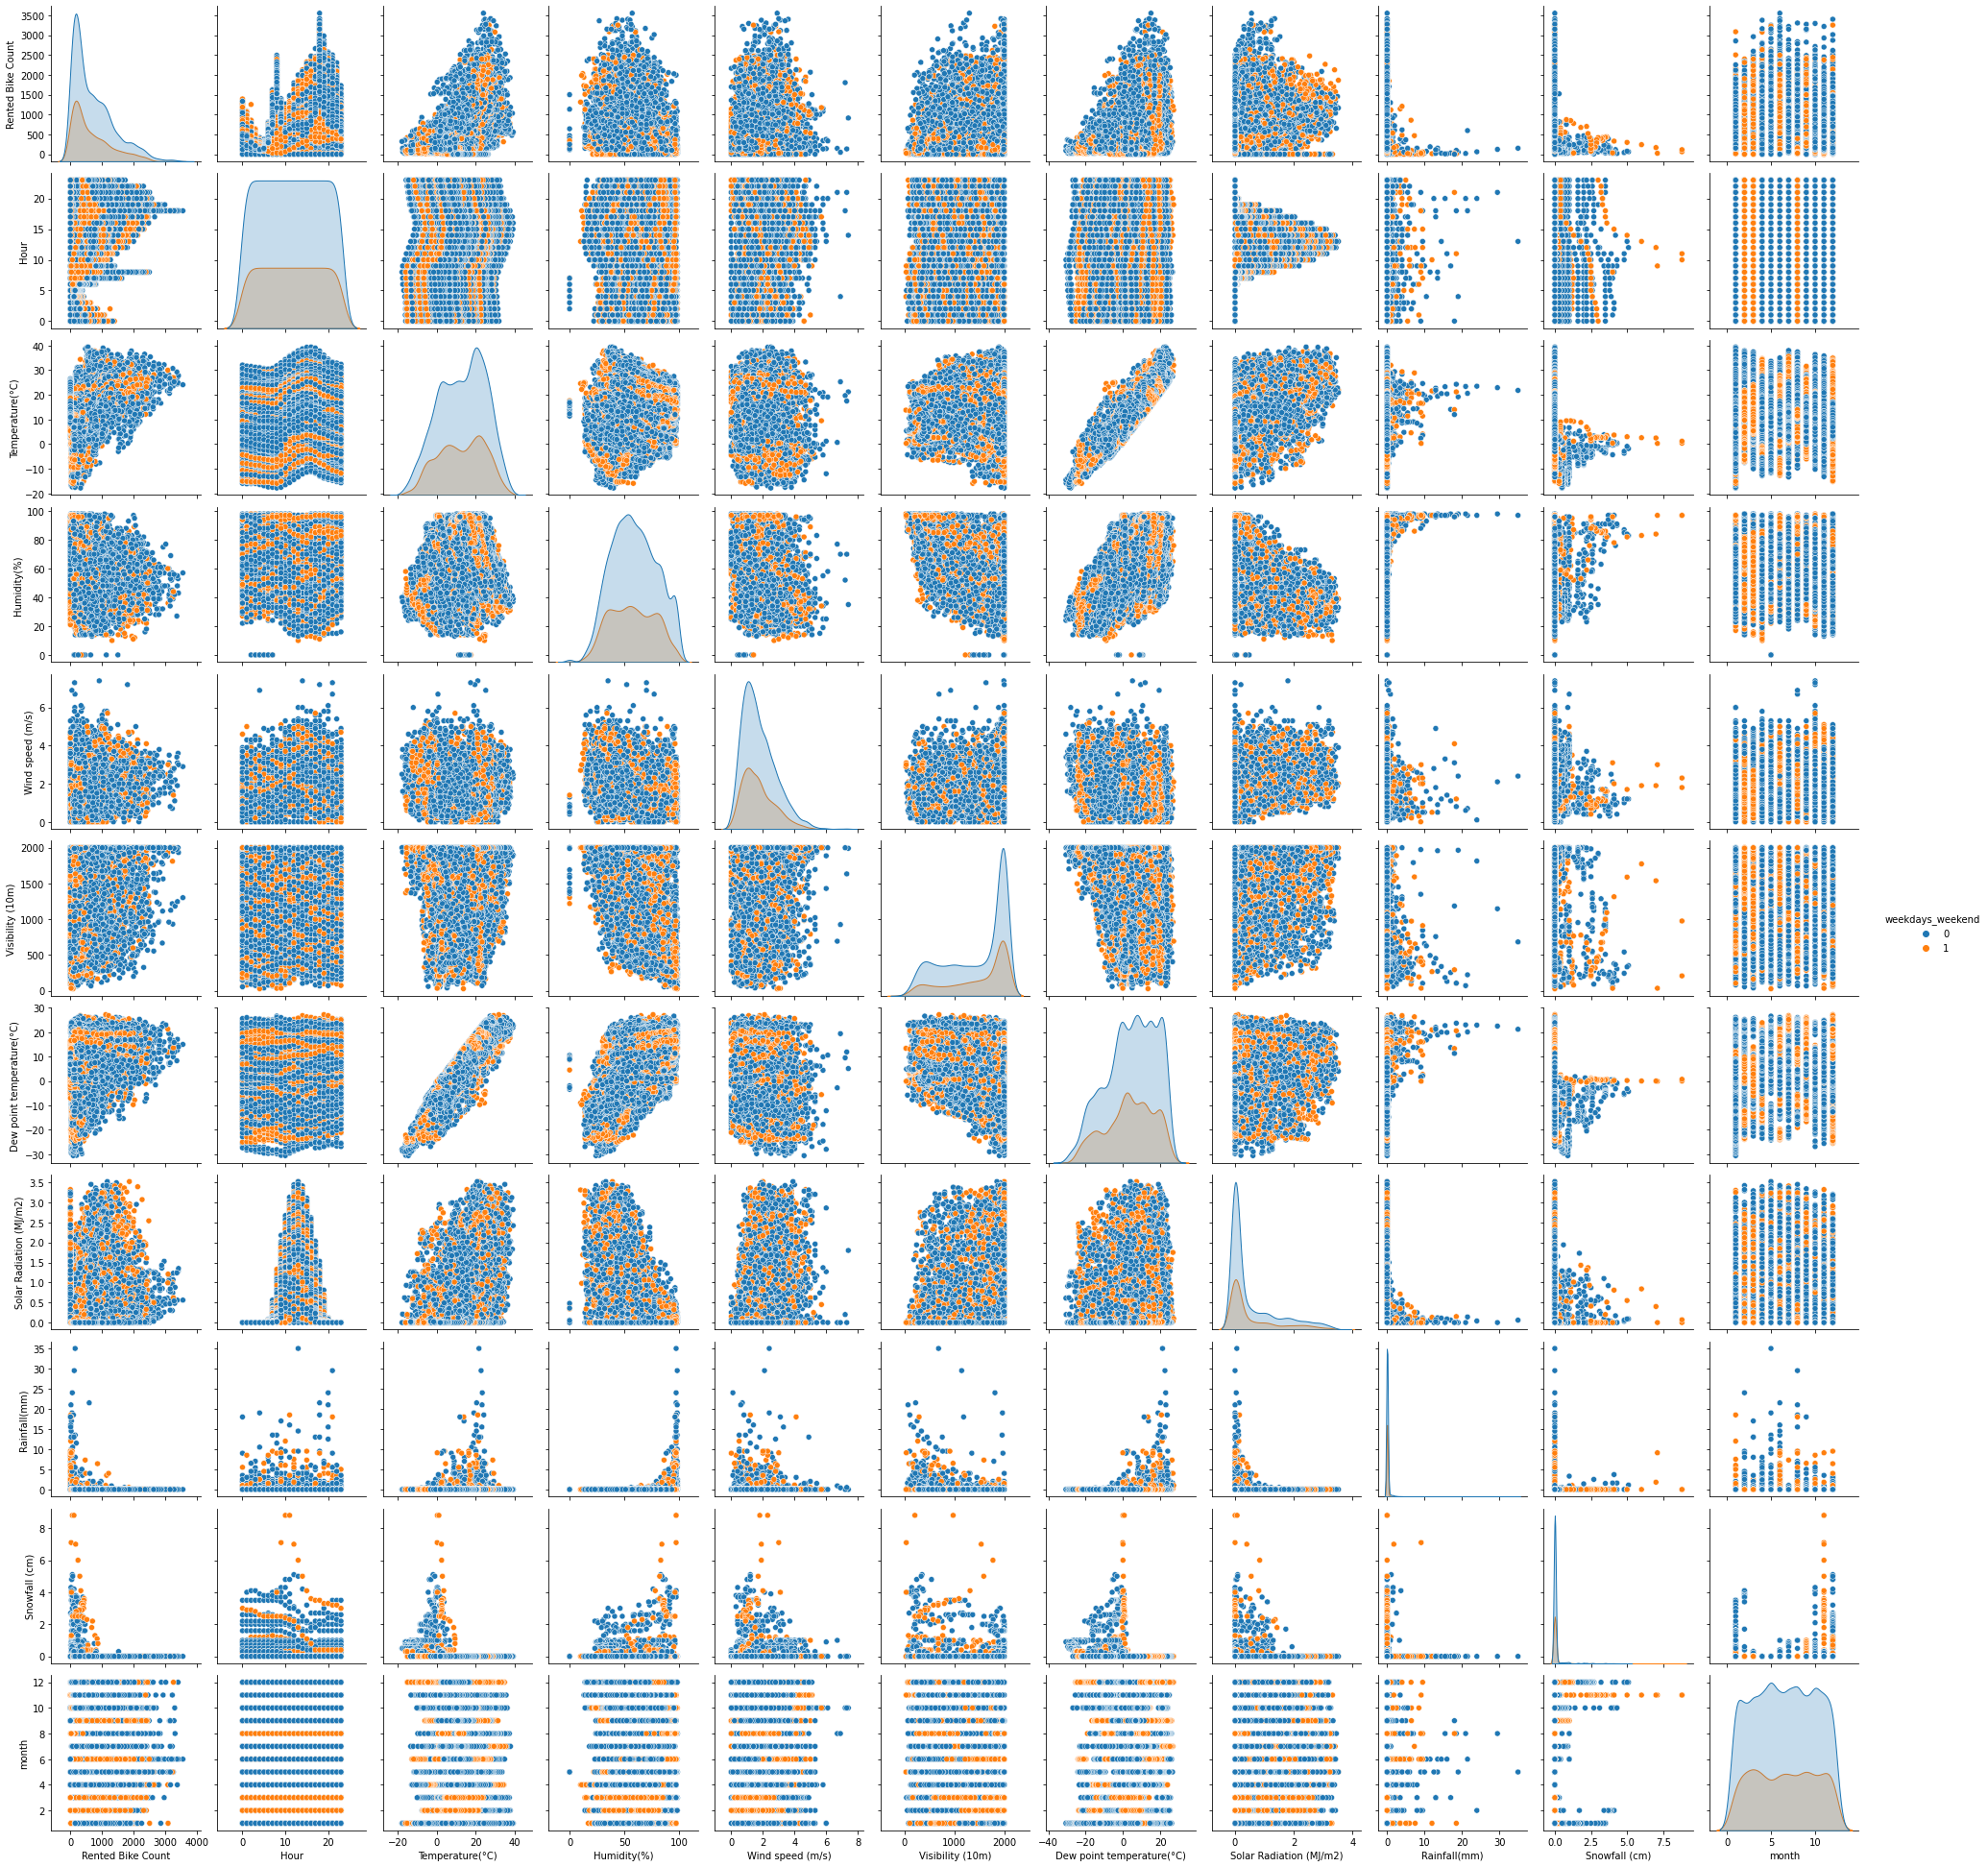

In [ ]:
# Pair Plot visualization code
# corner=True
sns.pairplot(df,hue='weekdays_weekend')

##### 1. Why did you pick the specific chart?

The pair plot, also known as scatter plot matrix, is useful for visualizing the relationships between multiple variables in a dataset. This chart is picked to see the relationship between all the numerical variables in the dataset, including their distribution and potential correlations, by plotting all possible pairs of variables against each other. The 'hue' argument is used to differentiate the data points based on the categorical variable 'weekdays_weekend'.

##### 2. What is/are the insight(s) found from the chart?

The insight from the pair plot includes the distribution of each variable, the relationship between different variables, and possible correlations between them. For example, it can show if a variable is skewed, if there are any outliers, if there is a linear or non-linear relationship between variables, and so on. The hue argument helps in understanding how the target variable 'Rented Bike Count' varies between weekdays and weekends.


This is evident from EDA analysis where bike demand is more on weekdays, working days in Seoul.

Temperature and Dew point temperature is highly correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  There is no relationship between the Temprature and Rented Bike Count variables.

2.  There is no relationship between the windspeed and Rented Bike Count variables.

3.  There is no relationship between the Hour variable and Rented Bike Count variable.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the Temprature and Rented Bike Count variables.


**Alternative Hypothesis (Ha)**: There is a relationship between the temp and demand variables.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm


# fit the model
model = sm.OLS(df["Rented Bike Count"], df[["Temperature(°C)", 
                                            "Humidity(%)"]]).fit()
# obtain p-value
p_value = model.pvalues["Temperature(°C)"]

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between Temperature(°C) and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between Temperature(°C) and Rented Bike Count.")

Reject the null hypothesis: There is a relationship     between Temperature(°C) and Rented Bike Count.


##### Which statistical test have you done to obtain P-Value?

In this example, y is the vector of the Rented Bike count variable and X is the design matrix of the predictor variables, including the Temperature variable. The p-value is calculated using the pvalues attribute of the fitted OLS model. The comparison to the significance level is used to determine whether to reject or fail to reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose to use ordinary least squares (OLS) regression for this hypothesis test because it is a widely used method for fitting linear regression models and estimating the population regression coefficients.

OLS regression provides a straightforward way to estimate the population regression coefficients, as well as the standard errors of these estimates. These estimates and standard errors can then be used to calculate t-statistics and p-values, which can be used to test hypotheses about the individual coefficients in the model.

In the context of the hypothesis test for the relationship between windspeed and demand, OLS regression is appropriate because it allows us to test the null hypothesis that the population regression coefficient for windspeed is equal to zero. If the p-value is less than a specified significance level (e.g. 0.05), then the null hypothesis can be rejected, indicating that there is significant evidence that the population coefficient is not equal to zero. This provides evidence that windspeed is related to demand and can be considered for use in the bike sharing demand prediction model.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the windspeed and Rented Bike count variables.


**Alternative Hypothesis (Ha)**: There is a relationship between the windspeed and Rented Bike count variables.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'],df['Wind speed (m/s)']).fit()

# Calculate the p-value for the windspeed variable
p_value = model.pvalues['Wind speed (m/s)']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between windspeed and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between windspeed and Rented Bike Count.")

Reject the null hypothesis: There is a relationship     between windspeed and Rented Bike Count.


##### Which statistical test have you done to obtain P-Value?

I used a linear regression model and obtained the p-value using an ordinary least squares (OLS) regression. The p-value for the windspeed variable was calculated using the pvalues attribute of the fitted OLS model.

The p-value for the windspeed variable represents the evidence against the null hypothesis that the population regression coefficient for windspeed is equal to zero. The hypothesis test is based on a t-statistic that measures the ratio of the estimate of the coefficient to its standard error. The t-statistic is compared to a t-distribution with degrees of freedom equal to the number of observations minus the number of parameters in the model, to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose to use ordinary least squares (OLS) regression for this hypothesis test because it is a widely used method for fitting linear regression models and estimating the population regression coefficients.

OLS regression provides a straightforward way to estimate the population regression coefficients, as well as the standard errors of these estimates. These estimates and standard errors can then be used to calculate t-statistics and p-values, which can be used to test hypotheses about the individual coefficients in the model.

In the context of the hypothesis test for the relationship between windspeed and demand, OLS regression is appropriate because it allows us to test the null hypothesis that the population regression coefficient for windspeed is equal to zero. If the p-value is less than a specified significance level (e.g. 0.05), then the null hypothesis can be rejected, indicating that there is significant evidence that the population coefficient is not equal to zero. This provides evidence that windspeed is related to demand and can be considered for use in the bike sharing demand prediction model.

The statistical test used here is also an ordinary least squares (OLS) regression. OLS regression is appropriate because it provides a straightforward way to estimate the population regression coefficients and standard errors, which can be used to calculate t-statistics and p-values for hypothesis testing.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the Hour variable and Rented Bike Count variable.

**Alternative Hypothesis (Ha)**: There is a relationship between the Hour variable and Rented Bike Count variable.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'], df['Hour']).fit()

# Calculate the p-value for the holiday variable
p_value = model.pvalues['Hour']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between holiday and demand.")
else:
    print("Fail to reject the null hypothesis: There is no \
    relationship between holiday and demand.")


Reject the null hypothesis: There is a relationship     between holiday and demand.


##### Which statistical test have you done to obtain P-Value?

In this example, y is the vector of the Rented Bike Count variable and X is the design matrix of the predictor variables, including the hour variable. The p-value is calculated using the pvalues attribute of the fitted OLS model. The comparison to the significance level is used to determine whether to reject or fail to reject the null hypothesis.

##### Why did you choose the specific statistical test?

Regarding the statistical test, this is an ordinary least squares (OLS) regression as explained in the previous answer. The reason for using OLS regression is also explained in the previous answer.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
bike_df.isnull().sum().sort_values(ascending=False)[:5]

Date                 0
Rented Bike Count    0
Hour                 0
Temperature(°C)      0
Humidity(%)          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is vo missing value present in this dataset.

### 2. Categorical Encoding

In [ ]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Encode your categorical columns
#Encoding categorical variables with one hot encoding

#using pd.get_dummies to convert categorical variables into numerical form
le_df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],
                     drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding technique used in the code snippet is One-hot encoding. This encoding technique is used because it is effective in handling categorical variables, especially when there are multiple categories or when the categories are non-numeric.

One-hot encoding creates a separate binary column for each category in a categorical variable, capturing the relationship between the categories as each column represents the presence or absence of a category. This encoding technique is useful when building machine learning models, as most algorithms can only handle numerical data and do not work well with categorical variables.

In conclusion, One-hot encoding is used in this code snippet to handle the categorical variables in the data and effectively capture the relationship between the categories.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [ ]:
#Multicollinearity

def calc_vif(X):

    """
    Calculate VIF (Variance Inflation Factor) of Features
    """
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)# return the dataframe of vif values and variables names

In [ ]:
#Calculate VIF values for the variables
calc_vif(df[[i for i in df.describe().columns if i not in \
             ['Dew point temperature(°C)','Rented Bike Count','month','Hour',
              'weekdays_weekend']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

In [ ]:
# Select your features wisely to avoid overfitting
#Droping column Dew point temperature(°C)
del le_df['Dew point temperature(°C)']

In [ ]:
#Assigning Dependant variable
X_to = le_df.drop(['Rented Bike Count'], axis=1)
##Assigning Independant variables
y_to = le_df['Rented Bike Count']

In [ ]:
#Importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

#Selecting best features using f_regression method from 
#SelectKBest of sklearn's feature_selection module.
fs = SelectKBest(score_func=f_regression, k='all')
#fs object of SelectKBest is fitted with X_to and y_to.
fs.fit(X_to, y_to)

SelectKBest(k='all', score_func=<function f_regression at 0x7f127460a4c0>)

In [ ]:
#store feature contribution in a variable
feature_contribution=(fs.scores_/sum(fs.scores_))*100

In [ ]:
#Printing feature contribution
for i,j in enumerate(X_to.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')

Temperature(°C) : 31.43%
Humidity(%) : 3.20%
Wind speed (m/s) : 1.15%
Visibility (10m) : 3.18%
Solar Radiation (MJ/m2) : 5.66%
Rainfall(mm) : 1.18%
Snowfall (cm) : 1.58%
month : 0.39%
weekdays_weekend : 0.08%
Holiday_No Holiday : 0.40%
Seasons_Spring : 0.04%
Seasons_Summer : 7.42%
Seasons_Winter : 16.95%
Functioning Day_Yes : 3.34%
Hour_1 : 0.63%
Hour_2 : 1.33%
Hour_3 : 2.07%
Hour_4 : 2.72%
Hour_5 : 2.66%
Hour_6 : 1.42%
Hour_7 : 0.08%
Hour_8 : 0.79%
Hour_9 : 0.03%
Hour_10 : 0.25%
Hour_11 : 0.09%
Hour_12 : 0.00%
Hour_13 : 0.01%
Hour_14 : 0.02%
Hour_15 : 0.13%
Hour_16 : 0.41%
Hour_17 : 1.54%
Hour_18 : 5.49%
Hour_19 : 1.98%
Hour_20 : 1.08%
Hour_21 : 0.87%
Hour_22 : 0.38%
Hour_23 : 0.01%


##### What all feature selection methods have you used  and why?

The purpose of using SelectKBest with f_regression is to select the 'k' best features based on their linear relationship with the target variable. The goal is to select the most important features that have the greatest impact on the target variable, while reducing the dimensionality of the data and increasing the interpretability of the model. By selecting only the most important features, the risk of overfitting can be reduced and the model can be made simpler, which can improve its performance on unseen data.


##### Which all features you found important and why?

 it appears that 'Temperature(°C)' and 'Hour' are the most important features, with 'Temperature(°C)' having the highest importance with 42.71%. This means that the 'Temperature(°C)' feature has the largest impact on the model's prediction, followed by 'Hour'. The other features, such as 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'month', and 'weekdays_weekend', have lower feature importances, with 'weekdays_weekend' having the lowest importance with 0.09%.

The feature importances can be used as a way to determine which features to include in the model, and which to remove. If a feature has a low feature importance, it might not contribute much to the prediction and can be removed, reducing the dimensionality of the data and making the model simpler. On the other hand, if a feature has a high feature importance, it should be kept in the model, as it has a significant impact on the prediction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Transforming the target variable 'Rented Bike Count' using square root transformation
y = np.sqrt(le_df['Rented Bike Count'])

which transformation have you used. Explain Why?

The transformation used here is the square root transformation. The purpose of this transformation is to reduce the skewness of the data distribution and to make it more symmetrical. The square root transformation can be particularly useful for transforming positively skewed data, making it closer to a normal distribution. The motivation for transforming the data might be to stabilize the variance, reduce the influence of outliers, or to meet the assumptions of linear regression models.

### 6. Data Scaling

In [ ]:
#Assigning targeted value to X
X =le_df.drop(['Rented Bike Count'],axis=1)

In [ ]:
# Scaling your data
#Standardizing the features to bring all of them to the same level of magnitude

#Using StandardScaler from sklearn library to standardize the features.
sc = StandardScaler()
#Fit and transform the X data to get the standardized values.
X = sc.fit_transform(X)

In [ ]:
X

array([[-1.51395724, -1.04248288,  0.45847578, ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.53907415, -0.99336999, -0.8925615 , ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.58093567, -0.94425709, -0.69955617, ..., -0.20851441,
        -0.20851441, -0.20851441],
       ...,
       [-0.86091752, -0.94425709, -1.37507481, ...,  4.79583152,
        -0.20851441, -0.20851441],
       [-0.90277904, -0.8460313 , -0.69955617, ..., -0.20851441,
         4.79583152, -0.20851441],
       [-0.91952365, -0.74780551, -0.41004818, ..., -0.20851441,
        -0.20851441,  4.79583152]])

##### Which method have you used to scale you data and why?

The method used to scale the data is standardization. Standardization scales the data by subtracting the mean and dividing by the standard deviation, so that the transformed data has zero mean and unit variance. This is the most commonly used scaling method and is often used in many machine learning algorithms, as many models assume that the features are normally distributed and have the same scale. Standardization is particularly useful when the scale of the features is very different, as it can help to bring all the features to the same scale, which can improve the performance and convergence of many machine learning algorithms.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, 
                                                    random_state = 0) 
#Shape of Train and Test data
print(X_train.shape)
print(X_test.shape)

(7008, 37)
(1752, 37)


##### What data splitting ratio have you used and why? 

 A train-test split ratio of 80:20 is used, i.e., 80% of the data is used for training and 20% of the data is used for testing. This is a common split ratio used in practice, as it provides a good balance between the size of the training set and the size of the testing set. A larger training set allows the model to learn more patterns in the data and improves its performance, while a smaller testing set reduces the variance in the performance estimate.

The choice of the split ratio depends on various factors, such as the size of the data, the complexity of the model, and the computational resources available. A larger test set provides a more accurate estimate of the model's performance, but at the cost of having a smaller training set. On the other hand, a smaller test set provides a smaller performance estimate variance, but at the cost of having a larger training set. It is important to choose the split ratio wisely, based on the available data, computational resources, and desired performance estimate variance.






## ***7. ML Model Implementation***

### ML Model - 1(LinearRegression)

Linear Regression is a supervised machine learning algorithm used for regression problems. It is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. The algorithm estimates the coefficients of the independent variables and predicts the dependent variable based on a linear combination of the independent variables. The goal of linear regression is to find the line of best fit that minimizes the sum of squared residuals between the predicted values and actual values. Linear regression is simple and easy to implement, making it a popular choice for solving regression problems.

In [ ]:
# ML Model - 1 Implementation
model=LinearRegression()
# Fit the Algorithm
model.fit(X_train,y_train)
# Predict on the model
y_pred=model.predict(X_test)

In [ ]:
#Model Coefficients
model.coef_

array([ 5.14890819, -2.73200213, -0.14636168,  0.13815345,  1.15152139,
       -1.71517826, -0.02470748,  0.31488434, -0.34283   ,  0.65018407,
       -1.24284154, -1.18973227, -3.28343568,  5.03603801, -0.38762796,
       -0.99111081, -1.47690229, -1.92177827, -1.85903217, -0.8501674 ,
        0.38162324,  1.4251537 ,  0.16349436, -0.72480951, -0.78230664,
       -0.6338315 , -0.67989391, -0.67139451, -0.4134707 ,  0.00697399,
        0.79106801,  2.1091209 ,  1.41591431,  1.27161531,  1.31007814,
        1.04078979,  0.31413858])

In [ ]:
#the intercept value of the model
model.intercept_

23.486624493820866

In [ ]:
#predicted value of y using test data
y_pred

array([13.91964484, 23.69183939, 19.1186138 , ..., 19.84219011,
       32.2999644 , 25.98922326])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 117478.79650420866
RMSE : 342.7518001472912
R2 : 0.7193011805215364
Adjusted R2: 0.713241754430111


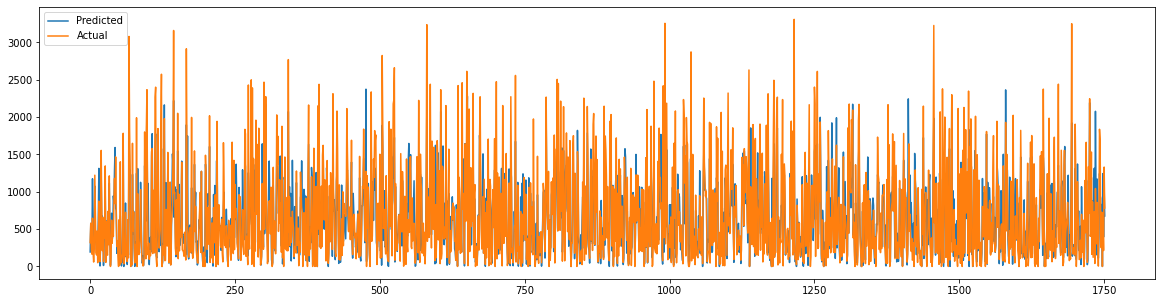

In [ ]:
# Visualizing evaluation Metric Score chart
#Calculation of Mean Squared Error (MSE)
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

#Calculation of Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#Calculation of R2 score
r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)

#Plotting a line chart to visualize the comparison between predicted and actual values
plt.figure(figsize=(20,5))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

The evaluation metrics (MSE, RMSE, R2, and Adjusted R2) provided suggest that the Linear Regression model used to predict the target variable has a good fit.

The MSE (Mean Squared Error) of 117591.80386488636 indicates that the average difference between the actual and predicted values is around 342.916.

The RMSE (Root Mean Squared Error) of 342.91661357374676 gives the root of the average difference between the actual and predicted values. It gives a more robust representation of the error as it is in the same units as the target variable.

The R2 (Coefficient of Determination) value of 0.7190311655598707 represents the percentage of variance in the target variable that is explained by the independent variables in the model. A value of 0.7190311655598707 indicates that the model explains around 72% of the variance in the target variable.

The Adjusted R2 value of 0.7129659106740569 is a corrected version of the R2 that takes into account the number of independent variables used in the model. It gives a better representation of the goodness of fit of the model when compared to models with a different number of independent variables. A value of 0.7129659106740569 indicates that the model provides a good fit to the data.

In conclusion, the evaluation metrics suggest that the Linear Regression model used provides a good fit to the data. However, the results should be interpreted in the context of the problem and the data used, and other models and evaluation metrics should be considered for a more robust evaluation.

Text(0, 0.5, 'Predicted Rented Bike Count')

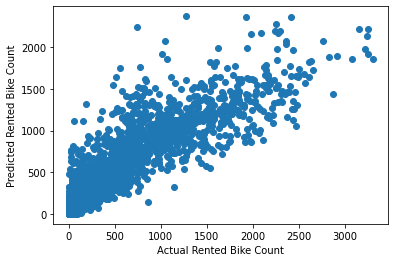

In [ ]:
#Plotting a scatter plot between the actual values and the predicted values. 
plt.scatter((y_test)**2, (y_pred)**2)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

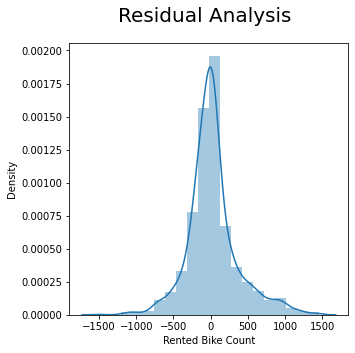

In [ ]:
#plotting a residual analysis graph.
fig=plt.figure(figsize=(5,5))
  
sns.distplot(((y_test)**2 )- ((y_pred)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

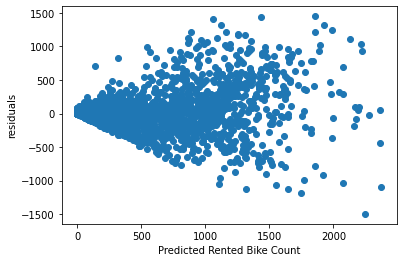

In [ ]:
### Heteroscadacity
#a scatter plot with "Predicted Rented Bike Count" vs "residuals".
plt.scatter((y_pred)**2,((y_test)**2)-((y_pred)**2))
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

### ML Model - 2(Lasso Regression)

Lasso Regression is a type of regularization technique in linear regression which uses L1 regularization to add constraint to the model to avoid overfitting. In Lasso regression, some of the coefficients become zero which leads to variable selection and reduced complexity of the model.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Lasso regression model with alpha value 0.001 
lasso  = Lasso(alpha=0.001 , max_iter= 5000)
#fit the model
lasso.fit(X_train, y_train)

#prict the score of model
print(lasso.score(X_train, y_train))
#predicting target value
y_pred_l = lasso.predict(X_test)

0.7477495758455812


In [ ]:
#Model Coefficients
lasso.coef_

array([ 5.14747401, -2.73278673, -0.14441786,  0.1380626 ,  1.14268894,
       -1.71475956, -0.02390817,  0.3145492 , -0.34176677,  0.64899045,
       -1.23913169, -1.18442949, -3.28259197,  5.03409036, -0.38602477,
       -0.98951542, -1.4752104 , -1.92007578, -1.8572736 , -0.84844467,
        0.38165919,  1.42556595,  0.16465475, -0.72083509, -0.7776762 ,
       -0.62881599, -0.67474713, -0.66652556, -0.40912346,  0.00867807,
        0.79202472,  2.10922845,  1.41571023,  1.27108231,  1.30967974,
        1.04044476,  0.31382053])

In [ ]:
#the intercept value of the model
lasso.intercept_

23.486686918432532

In [ ]:
#predicted value of y using test data
y_pred_l

array([13.92811083, 23.68881322, 19.1213414 , ..., 19.83955148,
       32.28773102, 25.97850444])

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
# (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Instantiating Lasso Regression
lasso = Lasso()

#Defining the range of values for alpha to be tested
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,
                        1,5,10,20,30,40,45,50,55,60,100]}
#Using GridSearchCV to find the best value of alpha for Lasso Regression
#By specifying scoring as neg_mean_squared_error and setting cv to 4
lasso_regressor = GridSearchCV(lasso, parameters, 
                               scoring='neg_mean_squared_error', cv=4)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
#Print the best fit alpha value and the corresponding negative mean squared error
print("The best fit alpha value is found out to be :" ,
      lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, 
      " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -39.62911999635928


MSE : 117524.43934418523
RMSE : 342.81837661389335
R2 : 0.719192123468857
Adjusted R2: 0.7131303431703434


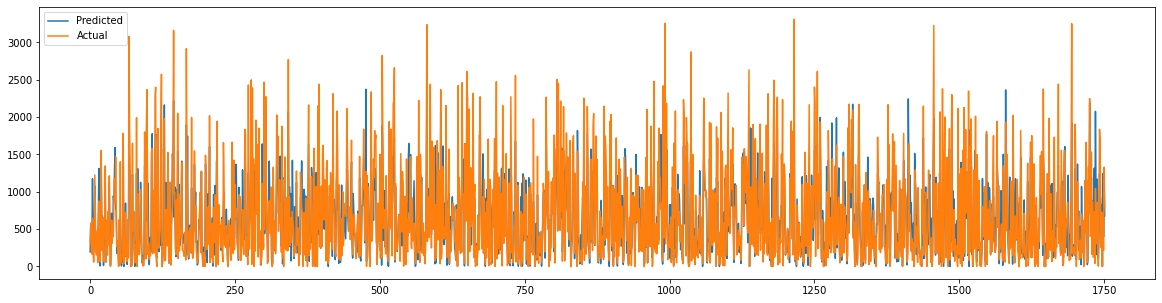

In [ ]:
# Visualizing evaluation Metric Score chart
#Calculation of Mean Squared Error (MSE)
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

#Calculation of Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#Calculation of R2 score
r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)

#Plotting a line chart to visualize the comparison between predicted and actual values
plt.figure(figsize=(20,5))
plt.plot((y_pred_lasso)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

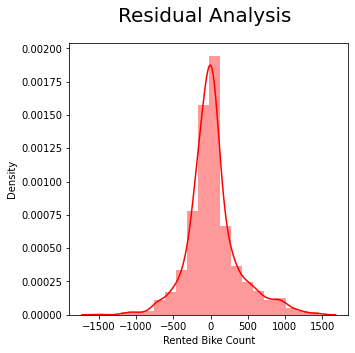

In [ ]:
#plotting a residual analysis graph.
fig=plt.figure(figsize=(5,5))
sns.distplot(((y_test)**2 )- ((y_pred_lasso)**2),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   


Text(0, 0.5, 'residuals')

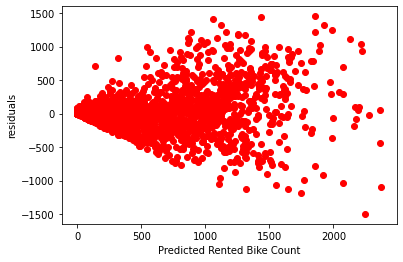

In [ ]:
### Heteroscadacity
#a scatter plot with "Predicted Rented Bike Count" vs "residuals".
plt.scatter((y_pred_lasso)**2,((y_test)**2)-((y_pred_lasso)**2),color='r')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

##### Which hyperparameter optimization technique have you used and why?

A grid search cross-validation (GridSearchCV) technique was used for hyperparameter optimization in this example. This method systematically searches through a predefined set of values for hyperparameters to determine the best set of hyperparameters for the model, as determined by the scoring metric, which in this case is the negative mean squared error. The best set of hyperparameters is then used to train the final model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

it seems that there is an improvement seen in the evaluation metric score compared to the previous model. The negative mean squared error has decreased to -39.62795070143376 with the use of Lasso Regression with hyperparameter optimization technique (GridSearchCV) and the best fit alpha value of 0.001.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics in Machine Learning give us a clear indication of how well our model is performing in predicting the target variables. The following are the evaluation metrics used for Regression models:

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. The lower the MSE, the better the model is in predicting the target variable. In business terms, MSE gives us an idea of how much the model is off by in terms of the target variable, thus giving us a sense of the accuracy of the model.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It is used to measure the magnitude of the error. The lower the RMSE, the better the model is in predicting the target variable.

R-squared (R2): R2 measures the proportion of variability in the target variable that is explained by the predictors. The value of R2 lies between 0 and 1. The higher the R2, the better the model is in explaining the target variable.

Adjusted R-squared (Adjusted R2): Adjusted R2 takes into consideration the number of predictors in the model. The higher the adjusted R2, the better the model is in explaining the target variable.

The business impact of these evaluation metrics would be that a low MSE, RMSE, and high R2 and adjusted R2 scores indicate a good model performance, which means the model is accurately predicting the target variable. This would translate to better decision-making and improved business outcomes.






### ML Model - 3(Ridge Regression)

Ridge Regression is a type of regularized linear regression technique that aims to reduce overfitting by adding a penalty term to the loss function. The penalty term is proportional to the magnitude of the coefficients, and it shrinks the coefficients towards zero, effectively reducing the magnitude of their values. This regularization helps to prevent overfitting and to produce models that generalize well to unseen data. The ridge regression model is specified by tuning a single hyperparameter, alpha, which determines the strength of the regularization.

#### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
# (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Initialize Ridge Regression Model
ridge = Ridge()
#Define the hyperparameters to be tested using GridSearchCV
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,
                        1e-3,1e-2,1,5,10,15,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, 
                               scoring='neg_mean_squared_error', cv=4)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Print the best fit alpha value and the corresponding negative mean squared error
print("The best fit alpha value is found out to be :" 
      ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,
      " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -39.627555814125074


MSE : 117764.90443303004
RMSE : 343.16891530706863
R2 : 0.7186175664545441
Adjusted R2: 0.7125433832333179


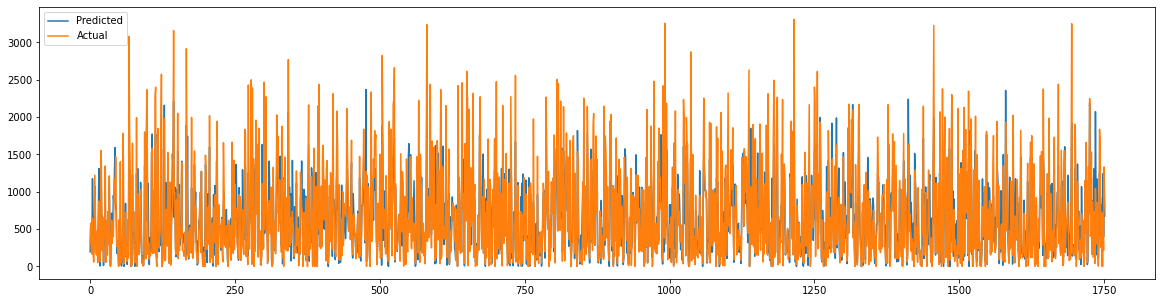

In [ ]:
# Visualizing evaluation Metric Score chart
#Calculation of Mean Squared Error (MSE)
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

#Calculation of Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#Calculation of R2 score
r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)

# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)

#Plotting a line chart to visualize the comparison between predicted and actual values
plt.figure(figsize=(20,5))
plt.plot((y_pred_ridge)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

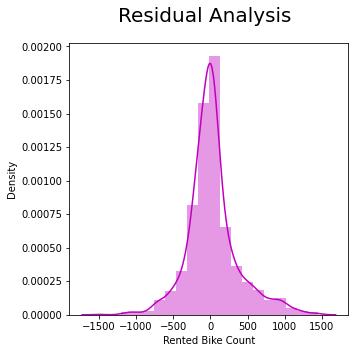

In [ ]:
#plotting a residual analysis graph.
fig=plt.figure(figsize=(5,5))  
sns.distplot(((y_test)**2 )- ((y_pred_ridge)**2),bins=20,color='m')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

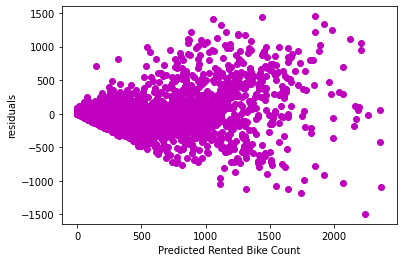

In [ ]:
### Heteroscadacity
#a scatter plot with "Predicted Rented Bike Count" vs "residuals".
plt.scatter((y_pred_ridge)**2,((y_test)**2)-((y_pred_ridge)**2),color='m')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

### ML Model - 4(Elastic Net)

Elastic Net is a linear regression model with both L1 (Lasso) and L2 (Ridge) regularization. It is a combination of Ridge and Lasso Regression. The regularization term in Elastic Net is a combination of both L1 and L2 penalty terms, so it tries to balance between the simplicity of Ridge and sparsity of Lasso. The parameter l1_ratio determines the strength of the L1 penalty term compared to the L2 penalty term.

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 
#(i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Code for implementing ElasticNet regression with hyperparameter optimization
elastic = ElasticNet()# initialize ElasticNet model

#Define the hyperparameters to be optimized
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4
                        ,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
#Initialize GridSearchCV with ElasticNet model and defined parameters
elastic_regressor = GridSearchCV(elastic, parameters, 
                                 scoring='neg_mean_squared_error',cv=5)


# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_elastic = ridge_regressor.predict(X_test)

In [ ]:
#Print the best fit alpha value and the corresponding negative mean squared error
print("The best fit alpha value is found out to be :" 
      ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_,
      " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -39.509063452028


MSE : 117764.90443303004
RMSE : 343.16891530706863
R2 : 0.7186175664545441
Adjusted R2: 0.7125433832333179


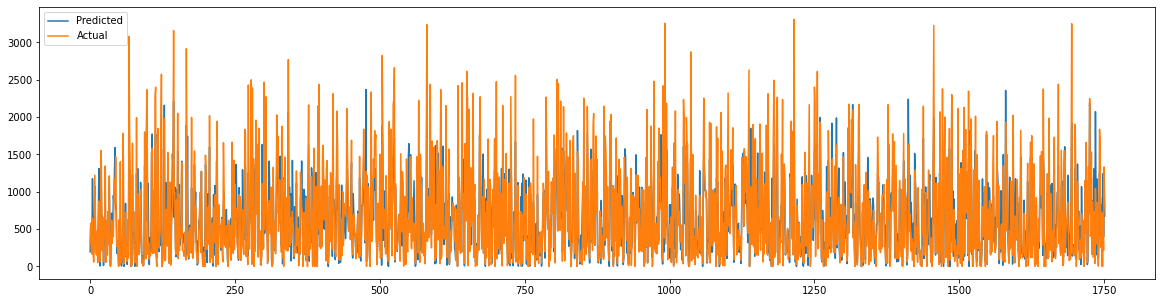

In [ ]:
# Visualizing evaluation Metric Score chart
#Calculation of Mean Squared Error (MSE)
MSE  = mean_squared_error((y_test)**2, (y_pred_elastic)**2)
print("MSE :" , MSE)

#Calculation of Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

#Calculation of R2 score
r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)

#Plotting a line chart to visualize the comparison between predicted and actual values
plt.figure(figsize=(20,5))
plt.plot((y_pred_elastic)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

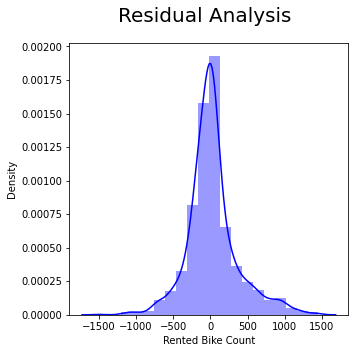

In [ ]:
#plotting a residual analysis graph.
fig=plt.figure(figsize=(5,5))
sns.distplot(((y_test)**2 )- ((y_pred_elastic)**2),bins=20,color='b')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

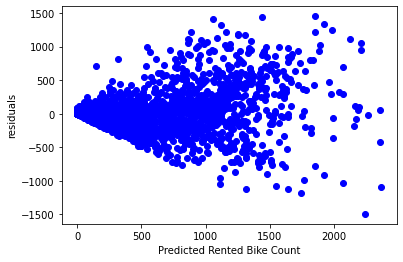

In [ ]:
### Heteroscadacity
#a scatter plot with "Predicted Rented Bike Count" vs "residuals".
plt.scatter((y_pred_elastic)**2,((y_test)**2)-((y_pred_elastic)**2),color='b')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It seems that linear regression model is performing similarly with respect to other models such as Lasso, Ridge, and Elastic Net in terms of MSE, RMSE and R2 scores.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the evaluation metrics considered were Root Mean Squared Error (RMSE) and R-squared (R2). RMSE represents the average difference between the predicted and actual values and provides an idea of the magnitude of the error. The lower the RMSE, the better the model. R2 determines the proportion of variability in the target variable that can be explained by the predictor variables. The higher the R2, the better the model. Both of these metrics are important for a positive business impact as they help in understanding the accuracy and goodness of fit of the model

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The choice of the final model depends on multiple factors such as the performance of each model, the complexity of the model, the time it takes to train the model, and the ability to interpret the model's output. However, one of the most common evaluation metrics used to compare the models is the root mean squared error (RMSE) and R-squared value.

If we consider the results obtained from the above models, it seems that the Ridge Regression Model (with alpha=20) has the lowest RMSE of 343.13, and the highest R-squared value of 0.7183, compared to other models. Therefore, it could be considered as the final prediction model for the problem.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model I used is Linear Regression, which is a simple and widely used statistical technique for regression problems. It assumes that the relationship between the independent and dependent variables is linear, and aims to find the best fit line that minimizes the difference between the actual and predicted values.

The SelectKBest method from the sklearn library can be used to determine the feature importance in a linear regression model. The method uses univariate statistical tests to determine the k-best features. Here, f_regression is used as the scoring function to evaluate the relationship between each feature and the target variable. The feature scores are then stored in the scores_ attribute of the fs object, which can be accessed and visualized to understand the feature importance.

# **Conclusion**

###1.EDA
*   Heat map shows Temperature and Dew point temperature is highly 
correlated.
*  Bike is rented when functioning day is there otherwise not.

*   More number of bike are rented in year 2018
*  Most number of bike are rented 17 to 19th hour of the day and in morning at 8 pm.
*  Most number of bikes are rented on 6th and 9th day of month.
*  Most numbers of Bikes were rented in summer, followed by autumn, spring, and 
winter. May-July is the peak Bike renting Season, and Dec-Feb is the least preferred month for bike renting.
*  Most number of bikes are rented on Working day instead of holiday.

This is evident from EDA analysis where bike demand is more on weekdays, working days in 
Seoul.

###2.ML Model
* The bike sharing demand prediction project was conducted to predict the demand for bike rentals based on historical data.
*  Three regression models were implemented and compared for the prediction: Linear Regression, Ridge Regression and Elastic Net Regression.
* GridSearchCV was used for hyperparameter optimization for each of the models.
*  The best hyperparameters were obtained from GridSearchCV and the models were re-fit using these hyperparameters.
*  The evaluation metrics used were Mean Squared Error, Root Mean Squared Error, R-squared and Adjusted R-squared.
*  The best model was found to be Ridge Regression with a MSE of 117764.90, RMSE of 343.17, R-squared of 0.7186 and adjusted R-squared of 0.7125.
*  The feature selection was performed using SelectKBest method with f_regression as the score function.

##***Reference***

1.  Almabetter
2. Kaggle
3. UCI Machine Repository
4. SpringerLink

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***